In [1]:
import numpy as np
import pandas as pd
import time
from itertools import product
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from scipy.interpolate import interp1d
from itertools import combinations

In [2]:
from Generators.GA.TestGeneticAlgorithm import GeneticAlgorithm

kwargs = {
    'cnn_model_path': 'Models/CNN_6_1_2.keras',
    'masked_sequence': 'AATACTAGAGGTCTTCCGACNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNGTGTGGGCGGGAAGACAACTAGGGG',
    'early_stopping_patience': 100,
}
target_expressions = [0, 0.25, 0.5, 0.75, 1]

iterations = 5

### Sequence Motifs Interact nonlinearly
---

In [3]:
from Generators.CNN import CNN
from itertools import product

def hamming_distance(seq1, seq2):
    return sum(c1 != c2 for c1, c2 in zip(seq1, seq2))

def generate_hybrids(A, B, up, down):

    differing_indices = [i for i in range(len(A)) if A[i] != B[i]]
    hybrids = []
    dist_to_As = []
    dist_to_Bs = []

    for choice in product([0, 1], repeat=len(differing_indices)):
        hybrid_chars = list(A)
        for idx, bit in zip(differing_indices, choice):
            hybrid_chars[idx] = B[idx] if bit == 1 else A[idx]

        hybrid = ''.join(hybrid_chars)
        dist_to_A = sum(1 for i in differing_indices if hybrid_chars[i] != A[i])
        dist_to_B = sum(1 for i in differing_indices if hybrid_chars[i] != B[i])

        hybrids.append(up + hybrid + down)
        dist_to_As.append(dist_to_A)
        dist_to_Bs.append(dist_to_B)

    return hybrids, dist_to_As, dist_to_Bs

cnn = CNN(kwargs['cnn_model_path'])

In [ ]:
#### NOT USED, JUST FOR SEEING WHAT THE HAMMING DISTANCE IS ####

results_df = pd.read_csv('Data/optimizer_evaluation_results.csv')
results_df = results_df[results_df['optimizer'] == 'Genetic Algorithm']
results_df = results_df[results_df['target_expression'] == 0]

results_df = results_df.sort_values(by='error')
best_sequence = results_df['sequence'].iloc[0]

hamming_distances = []
for sequence in results_df['sequence']:
    distance = hamming_distance(best_sequence, sequence)
    hamming_distances.append(distance)

results_df['hamming_distance'] = hamming_distances
results_df.head()


,optimizer,target_expression,iteration,sequence,prediction,error,runtime,prediction_history,error_history,hamming_distance
2,Genetic Algorithm,0.0,3,AATACTAGAGGTCTTCCGACGCATTCGTTATTGGCACCCCACGCTT...,0.107874,0.107874,14.538226,"[0.20979398, 0.18558095, 0.18558095, 0.1823005...","[0.20979398488998413, 0.18558095395565033, 0.1...",0
0,Genetic Algorithm,0.0,1,AATACTAGAGGTCTTCCGACCTATTGTTGCCCCCCTTCACTTTGTT...,0.125271,0.125271,9.327174,"[0.19003505, 0.1742371, 0.1742371, 0.1742371, ...","[0.19003504514694214, 0.17423710227012634, 0.1...",21
1,Genetic Algorithm,0.0,2,AATACTAGAGGTCTTCCGACCCTAGCCTTTTGCATCCAACCGCACG...,0.128758,0.128758,10.109105,"[0.21155733, 0.20428011, 0.20349696, 0.1908876...","[0.2115573287010193, 0.20428010821342468, 0.20...",20
4,Genetic Algorithm,0.0,5,AATACTAGAGGTCTTCCGACCCTAATTCGGCTTGTCGCCCCCGCTC...,0.134320,0.134320,13.142080,"[0.21676664, 0.19829234, 0.19033377, 0.1816486...","[0.21676664054393768, 0.1982923448085785, 0.19...",16
3,Genetic Algorithm,0.0,4,AATACTAGAGGTCTTCCGACCTCTTGCATTGCCCCCGCTCCTAATG...,0.136499,0.136499,11.628782,"[0.19595844, 0.19370854, 0.190929, 0.18500704,...","[0.1959584355354309, 0.19370853900909424, 0.19...",22


In [ ]:
# # Load and preprocess the data
# results_df = pd.read_csv('Data/optimizer_evaluation_results.csv')
# results_df = results_df[results_df['optimizer'] == 'Genetic Algorithm']
# results_df = results_df[results_df['target_expression'] == 0]

# # sort the dataframe by error
# results_df = results_df.sort_values(by='error')
# GA_1_target_0 = results_df['sequence'].iloc[0][20:50]
# GA_2_target_0 = results_df['sequence'].iloc[4][20:50]

# differences_target_0 = [True if GA_1_target_0[i] != GA_2_target_0[i] else False for i in range(len(GA_1_target_0))]

# up = 'AATACTAGAGGTCTTCCGAC'
# down = 'GTGTGGGCGGGAAGACAACTAGGGG'

# hybrids_target_0, dist_to_1_target_0, dist_to_2_target_0 = generate_hybrids(GA_1_target_0, GA_2_target_0, up, down)

# predictions_target_0 = cnn.predict(cnn.preprocess(hybrids_target_0))

In [ ]:
# dist_pred_map = {}
# for dist, pred in zip(dist_to_2_target_0, predictions_target_0):
#     dist_pred_map.setdefault(dist, []).append(pred)

# sorted_distances = sorted(dist_pred_map.keys())
# box_data = [dist_pred_map[dist] for dist in sorted_distances]

# plt.figure(figsize=(10, 6))
# box = plt.boxplot(box_data, patch_artist=True, tick_labels=sorted_distances)

# for patch in box['boxes']:
#     patch.set_facecolor('orange')
#     patch.set_alpha(0.5)

# plt.xlabel('Number of Nucleotide Subsitutions')
# plt.ylabel('Prediction')
# plt.grid(axis='y')
# plt.tight_layout()
# plt.show()

In [35]:
# Load and preprocess the data
results_df = pd.read_csv('Data/optimizer_evaluation_results.csv')
results_df = results_df[results_df['optimizer'] == 'Genetic Algorithm']
results_df = results_df[results_df['target_expression'] == 1]

# sort the dataframe by error
results_df = results_df.sort_values(by='error')
GA_1 = results_df['sequence'].iloc[0][20:50]
GA_2 = results_df['sequence'].iloc[1][20:50]
GA_3 = results_df['sequence'].iloc[2][20:50]

differences_2 = [True if GA_1[i] != GA_2[i] else False for i in range(len(GA_1))]
differences_3 = [True if GA_1[i] != GA_3[i] else False for i in range(len(GA_1))]

up = 'AATACTAGAGGTCTTCCGAC'
down = 'GTGTGGGCGGGAAGACAACTAGGGG'

hybrids_2, dist_to_1_form_2, dist_to_2 = generate_hybrids(GA_1, GA_2, up, down)
hybrids_3, dist_to_1_form_3, dist_to_3 = generate_hybrids(GA_1, GA_3, up, down)

predictions_2 = cnn.predict(cnn.preprocess(hybrids_2))
predictions_3 = cnn.predict(cnn.preprocess(hybrids_3))

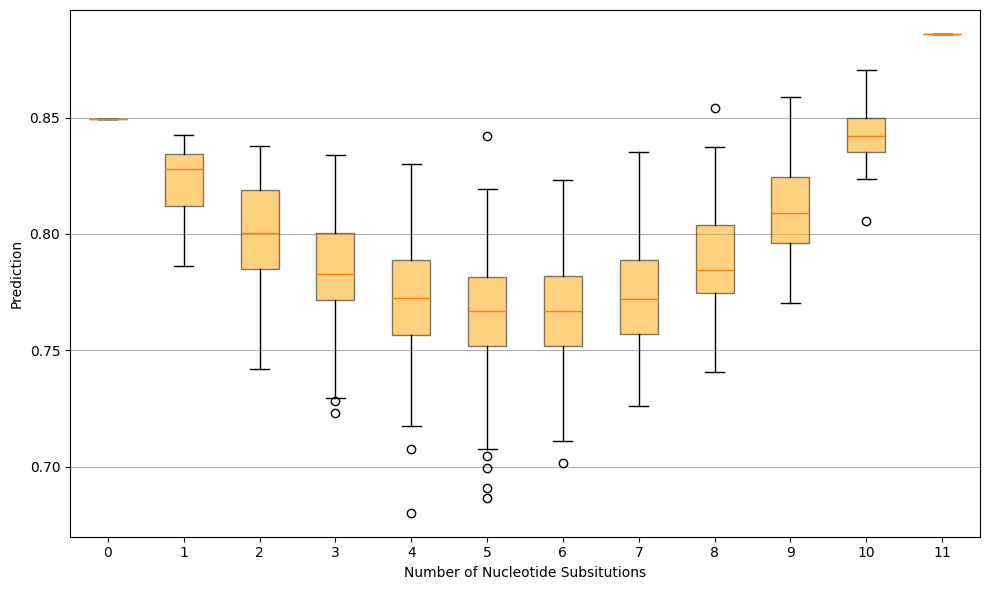

In [32]:
dist_pred_map = {}
for dist, pred in zip(dist_to_2, predictions_2):
    dist_pred_map.setdefault(dist, []).append(pred)

sorted_distances = sorted(dist_pred_map.keys())
box_data = [dist_pred_map[dist] for dist in sorted_distances]

plt.figure(figsize=(10, 6))
box = plt.boxplot(box_data, patch_artist=True, tick_labels=sorted_distances)

for patch in box['boxes']:
    patch.set_facecolor('orange')
    patch.set_alpha(0.5)

plt.xlabel('Number of Nucleotide Subsitutions')
plt.ylabel('Prediction')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


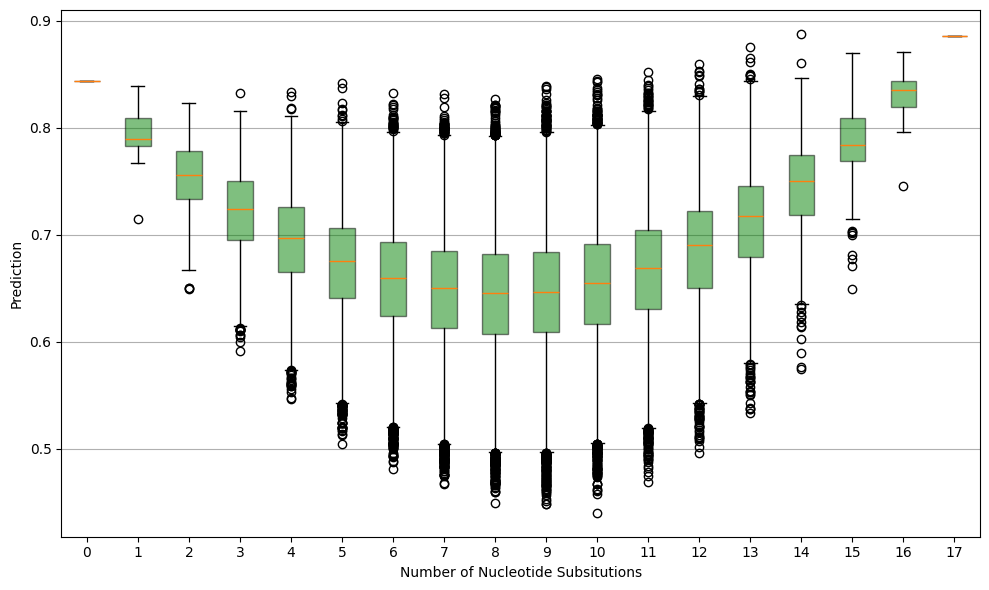

In [36]:
dist_pred_map = {}
for dist, pred in zip(dist_to_3, predictions_3):
    dist_pred_map.setdefault(dist, []).append(pred)

sorted_distances = sorted(dist_pred_map.keys())
box_data = [dist_pred_map[dist] for dist in sorted_distances]

plt.figure(figsize=(10, 6))
box = plt.boxplot(box_data, patch_artist=True, tick_labels=sorted_distances)

for patch in box['boxes']:
    patch.set_facecolor('green')
    patch.set_alpha(0.5)

plt.xlabel('Number of Nucleotide Subsitutions')
plt.ylabel('Prediction')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


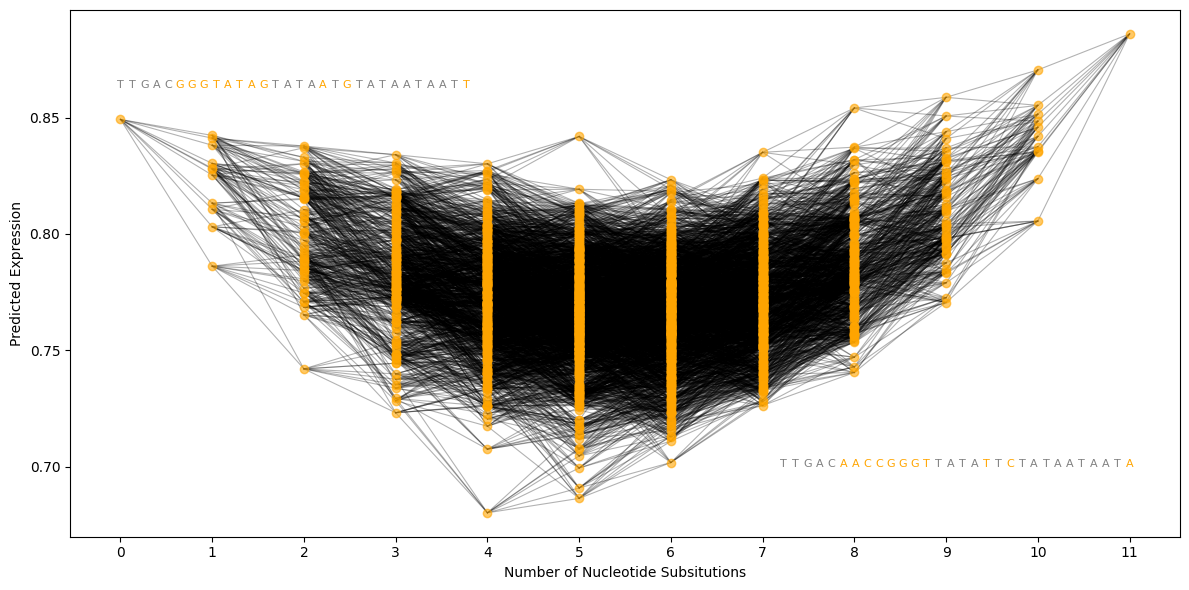

In [41]:
grouped = {}
for dist, pred, seq in zip(dist_to_2, predictions_2, hybrids_2):
    grouped.setdefault(dist, []).append((seq, pred))

plt.figure(figsize=(12, 6))

sorted_dists = sorted(grouped.keys())
for i in range(len(sorted_dists) - 1):
    d1 = sorted_dists[i]
    d2 = sorted_dists[i + 1]
    group1 = grouped[d1]
    group2 = grouped[d2]

    for seq1, pred1 in group1:
        for seq2, pred2 in group2:
            if hamming_distance(seq1, seq2) == 1:
                plt.plot([d1, d2], [pred1, pred2], color='black', alpha=0.3, linewidth=0.8)

for dist, items in grouped.items():
    items.sort(key=lambda x: x[0])
    sequences, preds = zip(*items)
    x_vals = [dist] * len(preds)
    plt.scatter(x_vals, preds, label=f'Distance {dist}', color='orange', alpha=0.6, zorder=3)

match_color = 'gray'
diff_color = 'orange'
fontsize = 8
char_width = 0.13

x0 = 0
y0 = 0.8625
for i, (c1, c2) in enumerate(zip(GA_1, GA_2)):
    color = diff_color if c1 != c2 else match_color
    x_char = x0 + i * char_width
    plt.text(x_char, y0, c2, fontsize=fontsize, ha='center', color=color)

x1 = 11
y1 = 0.7
for i, (c1, c2) in enumerate(zip(GA_1, GA_2)):
    color = diff_color if c1 != c2 else match_color
    x_char = x1 - (len(GA_2) - i - 1) * char_width
    plt.text(x_char, y1, c1, fontsize=fontsize, ha='center', color=color)

plt.xticks(range(min(sorted_dists), max(sorted_dists) + 1, 1))
plt.xlabel(f'Number of Nucleotide Subsitutions')
plt.ylabel('Predicted Expression')
plt.tight_layout()
plt.show()

### Consensus shows up in high expression promoters
---

In [4]:
def count_matched_motifs(s, target, min_shared=5):
    t_len = len(target)
    color_map = [False] * len(s)

    for i in range(len(s) - t_len + 1):
        window = s[i:i + t_len]
        match_positions = [j for j in range(t_len) if window[j] == target[j]]
        if len(match_positions) >= min_shared:
            for j in match_positions:
                color_map[i + j] = True

    return sum(color_map)

targets = {
    "-35": "TTGACA",
    "-10": "TATAAT"
}

In [5]:
target_expressions = np.linspace(0, 1, 11)
iterations = 20
results = {
    'target_expression': [],
    'sequence': [],
    'prediction': [],
    'error': [],
    'h35_count': [],
    'h10_count': [],
    'total_count': [],
}

for target_expression in target_expressions:
    for i in range(iterations):
        print(f"Running Genetic Algorithm for target expression {target_expression} (iteration {i})                                 ", end='\r')
        if target_expression == 0 or target_expression == 1:
            seed = i + 20
        else:
            seed = i
        ga = GeneticAlgorithm(
            **kwargs,
            target_expression=target_expression,
            seed=seed,
        )
        best_sequence, best_prediction, best_error = ga.run()

        results['target_expression'].append(target_expression)
        results['sequence'].append(best_sequence)
        results['prediction'].append(best_prediction)
        results['error'].append(best_error)

        h35_count = count_matched_motifs(best_sequence, targets['-35'])
        h10_count = count_matched_motifs(best_sequence, targets['-10'])

        results['h35_count'].append(h35_count)
        results['h10_count'].append(h10_count)
        results['total_count'].append(h35_count + h10_count)

consensus_count_df = pd.DataFrame(results)

In [16]:
def count_motifs_occurance(s, target, min_shared=5):
    t_len = len(target)
    occurances = 0

    for i in range(len(s) - t_len + 1):
        window = s[i:i + t_len]
        match_positions = [j for j in range(t_len) if window[j] == target[j]]
        if len(match_positions) >= min_shared:
            occurances += 1

    return occurances

def count_matched_nucleotides(s, target, min_shared=5):
    t_len = len(target)
    color_map = [False] * len(s)

    for i in range(len(s) - t_len + 1):
        window = s[i:i + t_len]
        match_positions = [j for j in range(t_len) if window[j] == target[j]]
        if len(match_positions) >= min_shared:
            for j in match_positions:
                color_map[i + j] = True

    return sum(color_map)

def overlapping_nucleotides_in_motifs(s, target, min_shared=5):
    t_len = len(target)
    indicies = [0 for _ in range(len(s))]

    for i in range(len(s) - t_len + 1):
        window = s[i:i + t_len]
        match_positions = [j for j in range(t_len) if window[j] == target[j]]
        if len(match_positions) >= min_shared:
            for j in match_positions:
                indicies[i + j] += 1

    occurances = sum(1 for count in indicies if count > 1)
    return occurances

def distance_between_motifs(s, target, min_shared=5):
    t_len = len(target)
    match_windows = []

    for i in range(len(s) - t_len + 1):
        window = s[i:i + t_len]
        shared = sum(1 for j in range(t_len) if window[j] == target[j])
        if shared >= min_shared:
            match_windows.append((i, i + t_len - 1))

    if len(match_windows) < 2:
        return np.nan

    # Distance between end of one motif and start of the next
    distances = []
    for (start1, end1), (start2, _) in zip(match_windows[:-1], match_windows[1:]):
        distance = start2 - end1 - 1
        distances.append(distance)

    return np.mean(distances)

def distance_between_motif_pairs(s, target1, target2, min_shared=5):
    t1_len = len(target1)
    t2_len = len(target2)
    t1_matches = []
    t2_matches = []

    for i in range(len(s) - t1_len + 1):
        window = s[i:i + t1_len]
        shared = sum(1 for j in range(t1_len) if window[j] == target1[j])
        if shared >= min_shared:
            t1_matches.append((i, i + t1_len - 1))  # store start and end

    for i in range(len(s) - t2_len + 1):
        window = s[i:i + t2_len]
        shared = sum(1 for j in range(t2_len) if window[j] == target2[j])
        if shared >= min_shared:
            t2_matches.append(i)

    distances = []
    for start1, end1 in t1_matches:
        downstream_t2 = [start2 for start2 in t2_matches if start2 > end1]
        if downstream_t2:
            closest = min(downstream_t2)
            distances.append(closest - end1 - 1)  # exclude overlap

    return distances



In [17]:
# remove duplicates
num_before = len(consensus_count_df)
num_after = len(consensus_count_df.drop_duplicates(subset=['sequence']))
consensus_count_df = consensus_count_df.drop_duplicates(subset=['sequence'])

print(f"Number of sequences before removing duplicates: {num_before}")
print(f"Number of sequences after removing duplicates: {num_after}")
print(f"Number of duplicates removed: {num_before - num_after}")


Number of sequences before removing duplicates: 214
Number of sequences after removing duplicates: 214
Number of duplicates removed: 0


In [18]:
temp_df = consensus_count_df.copy()
temp_df = temp_df[temp_df['target_expression'] == 1]

temp_df

,target_expression,sequence,prediction,error,h35_count,h10_count,total_count,prediction_bin,near_consensus_h35_count,near_consensus_h10_count,consensus_h35_count,consensus_h10_count,num_multiple_h35,num_multiple_h10,overlapping_h35,overlapping_h10,distance_between_h35,distance_between_h10,mean_distance_between_h35_h10
196,1.0,AATACTAGAGGTCTTCCGACTAACCGGGATTAAAATGATGTATAAT...,0.804957,0.195042,0,11,11,0.8,0,2,0,1,0,2,0,0,NaN,4.000000,NaN
197,1.0,AATACTAGAGGTCTTCCGACTTGACAAAACCAGTTTATGCTATAAT...,0.923919,0.076081,6,9,15,0.9,1,2,1,1,0,2,0,2,NaN,-3.000000,14.0
198,1.0,AATACTAGAGGTCTTCCGACTTGAGGTATAATTATAATTGGTGTAG...,0.787060,0.212940,0,12,12,0.7,0,2,0,2,0,2,0,0,NaN,0.000000,NaN
199,1.0,AATACTAGAGGTCTTCCGACTTGACGGCTATAATATAATGTATAAT...,0.857502,0.142498,5,17,22,0.8,1,3,0,3,0,3,0,1,NaN,0.000000,2.0
200,1.0,AATACTAGAGGTCTTCCGACTTGCTAAACGGTCTATAATTTATAAT...,0.856234,0.143766,0,12,12,0.8,0,2,0,2,0,2,0,0,NaN,1.000000,NaN
201,1.0,AATACTAGAGGTCTTCCGACTTGACTTAAGAGGTATAATGATTATA...,0.868446,0.131554,5,11,16,0.8,1,2,0,1,0,2,0,0,NaN,3.000000,7.0
202,1.0,AATACTAGAGGTCTTCCGACACTGATGCTATAATATAATATCATTG...,0.791282,0.208718,5,15,20,0.7,1,3,0,2,0,3,0,2,NaN,-1.000000,NaN
203,1.0,AATACTAGAGGTCTTCCGACTTGACAAGGAGGTTATAATTTATAAT...,0.895660,0.104340,6,15,21,0.8,1,3,1,2,0,3,0,2,NaN,-1.000000,7.0
204,1.0,AATACTAGAGGTCTTCCGACTTGACTGATAAGGTATAATTTATAAT...,0.897888,0.102112,5,12,17,0.8,1,2,0,2,0,2,0,0,NaN,1.000000,7.0
205,1.0,AATACTAGAGGTCTTCCGACTTGCTAAAGGGCTATAATGATATAAT...,0.853137,0.146863,0,12,12,0.8,0,2,0,2,0,2,0,0,NaN,2.000000,NaN


In [19]:
bins = np.linspace(0, 1, 11)
labels = [f"{b:.1f}" for b in bins[:-1]]

# Bin the predictions for plotting
consensus_count_df['prediction_bin'] = pd.cut(consensus_count_df['prediction'], bins=bins, labels=labels, include_lowest=True)

# near consensus
consensus_count_df['near_consensus_h35_count'] = consensus_count_df['sequence'].apply(
    lambda x: count_motifs_occurance(x, targets['-35'], min_shared=5)
)
consensus_count_df['near_consensus_h10_count'] = consensus_count_df['sequence'].apply(
    lambda x: count_motifs_occurance(x, targets['-10'], min_shared=5)
)
consensus_count_df['consensus_h35_count'] = consensus_count_df['sequence'].apply(
    lambda x: count_motifs_occurance(x, targets['-35'], min_shared=6)
)
# consensus
consensus_count_df['consensus_h10_count'] = consensus_count_df['sequence'].apply(
    lambda x: count_motifs_occurance(x, targets['-10'], min_shared=6)
)

consensus_count_df['num_multiple_h35'] = consensus_count_df.apply(
    lambda row: row['near_consensus_h35_count'] if row['near_consensus_h35_count'] > 1 else 0,
    axis=1
)
consensus_count_df['num_multiple_h10'] = consensus_count_df.apply(
    lambda row: row['near_consensus_h10_count'] if row['near_consensus_h10_count'] > 1 else 0,
    axis=1
)

# Calculate overlapping nucleotides and distances
consensus_count_df['overlapping_h35'] = consensus_count_df['sequence'].apply(
    lambda x: overlapping_nucleotides_in_motifs(x, targets['-35'], min_shared=5)
)
consensus_count_df['overlapping_h10'] = consensus_count_df['sequence'].apply(
    lambda x: overlapping_nucleotides_in_motifs(x, targets['-10'], min_shared=5)
)

# Calculate distances between motifs
consensus_count_df['distance_between_h35'] = consensus_count_df['sequence'].apply(
    lambda x: distance_between_motifs(x, targets['-35'], min_shared=5)
)
consensus_count_df['distance_between_h10'] = consensus_count_df['sequence'].apply(
    lambda x: distance_between_motifs(x, targets['-10'], min_shared=5)
)
consensus_count_df['mean_distance_between_h35_h10'] = consensus_count_df['sequence'].apply(
    lambda x: np.mean(distance_between_motif_pairs(x, targets['-35'], targets['-10'], min_shared=5)) 
    if distance_between_motif_pairs(x, targets['-35'], targets['-10'], min_shared=5) else np.nan
)

In [20]:
consensus_count_df.to_csv('Data/GA_220_sequence_analysis.csv', index=False)

In [21]:
consensus_count_df = pd.read_csv('Data/GA_220_sequence_analysis.csv')

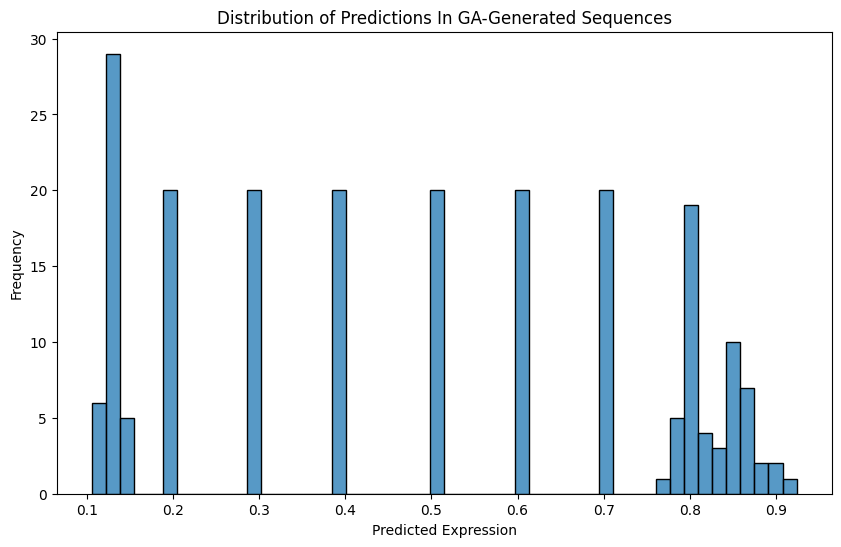

In [64]:
# plot the distribution of "predictions" for the whole df
plt.figure(figsize=(10, 6))
sns.histplot(consensus_count_df['prediction'], bins=50)
plt.xlabel('Predicted Expression')
plt.ylabel('Frequency')
plt.title('Distribution of Predictions In GA-Generated Sequences')
plt.show()



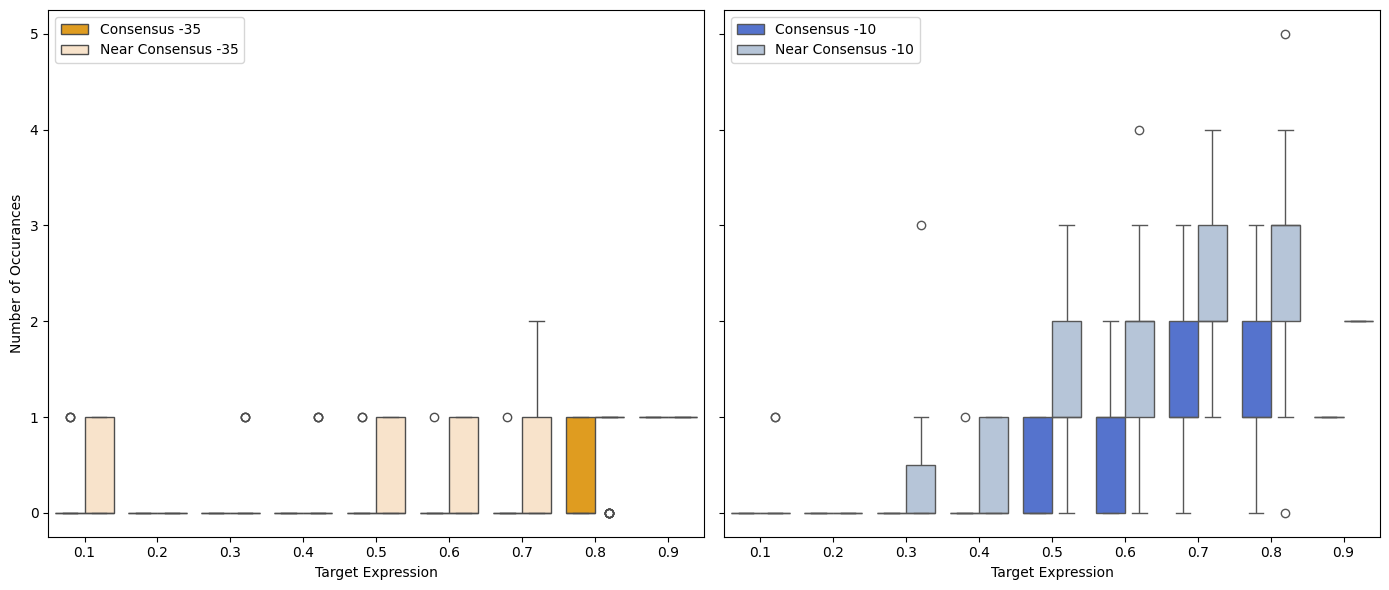

In [22]:
color_map  = {
    'consensus 35': 'orange',
    'near consensus 35': 'bisque',
    'consensus 10': 'royalblue',
    'near consensus 10': 'lightsteelblue',
}

plot_df = pd.DataFrame()

for motif in ['35', '10']:
    temp_df = consensus_count_df[['prediction_bin']].copy()
    temp_df['count'] = consensus_count_df[f'consensus_h{motif}_count']
    temp_df['Type'] = f'Consensus -{motif}'
    plot_df = pd.concat([plot_df, temp_df])

    temp_df = consensus_count_df[['prediction_bin']].copy()
    temp_df['count'] = consensus_count_df[f'near_consensus_h{motif}_count']
    temp_df['Type'] = f'Near Consensus -{motif}'
    plot_df = pd.concat([plot_df, temp_df])

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

for i, motif in enumerate(['35', '10']):
    subset = plot_df[plot_df['Type'].str.contains(f'-{motif}')]
    sns.boxplot(
        data=subset,
        x='prediction_bin',
        y='count',
        hue='Type',
        palette={
            f'Consensus -{motif}': color_map[f'consensus {motif}'],
            f'Near Consensus -{motif}': color_map[f'near consensus {motif}']
        },
        ax=axes[i]
    )
    axes[i].set_xlabel('Target Expression')
    axes[i].set_ylabel('Number of Occurances')
    axes[i].legend(loc='upper left')

plt.tight_layout()
plt.show()


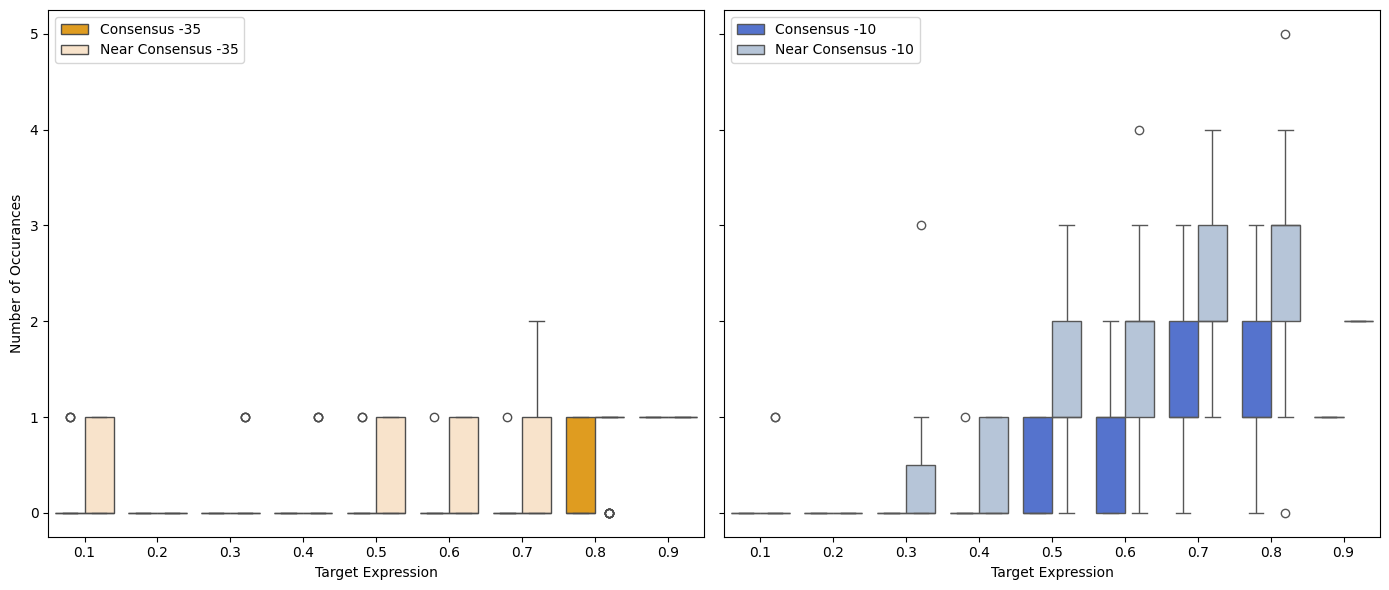

In [23]:
color_map  = {
    'consensus 35': 'orange',
    'near consensus 35': 'bisque',
    'consensus 10': 'royalblue',
    'near consensus 10': 'lightsteelblue',
}

plot_df = pd.DataFrame()

for motif in ['35', '10']:
    temp_df = consensus_count_df[['prediction_bin']].copy()
    temp_df['count'] = consensus_count_df[f'consensus_h{motif}_count']
    temp_df['Type'] = f'Consensus -{motif}'
    plot_df = pd.concat([plot_df, temp_df])

    temp_df = consensus_count_df[['prediction_bin']].copy()
    temp_df['count'] = consensus_count_df[f'near_consensus_h{motif}_count']
    temp_df['Type'] = f'Near Consensus -{motif}'
    plot_df = pd.concat([plot_df, temp_df])

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

for i, motif in enumerate(['35', '10']):
    subset = plot_df[plot_df['Type'].str.contains(f'-{motif}')]
    sns.boxplot(
        data=subset,
        x='prediction_bin',
        y='count',
        hue='Type',
        palette={
            f'Consensus -{motif}': color_map[f'consensus {motif}'],
            f'Near Consensus -{motif}': color_map[f'near consensus {motif}']
        },
        ax=axes[i]
    )
    axes[i].set_xlabel('Target Expression')
    axes[i].set_ylabel('Number of Occurances')
    axes[i].legend(loc='upper left')

plt.tight_layout()
plt.show()


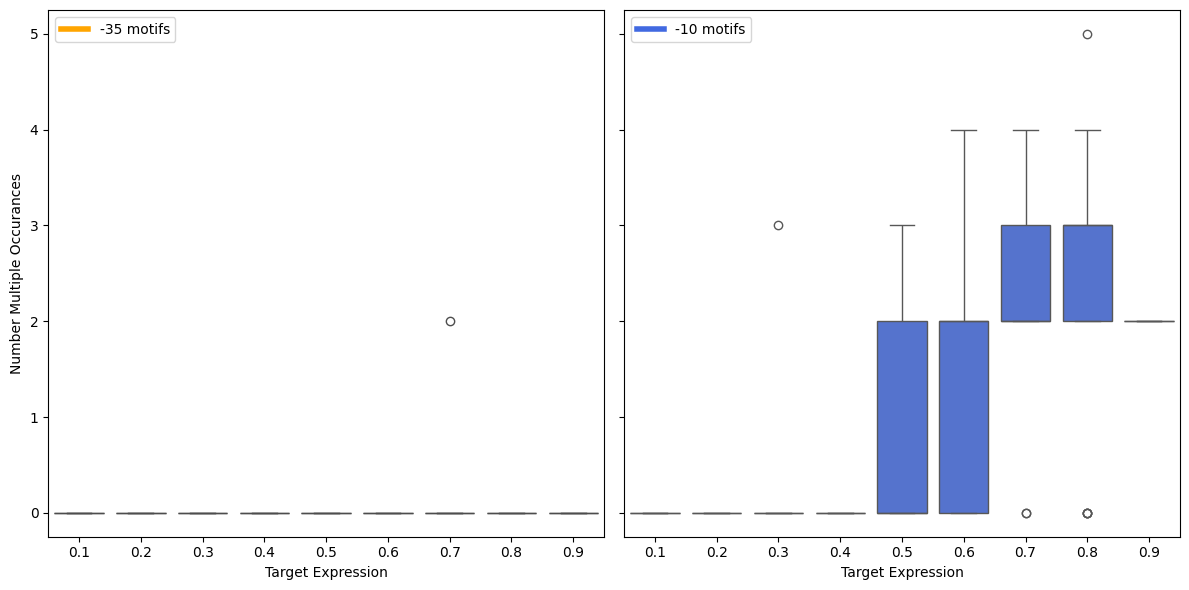

In [24]:
color_map  = {
    '35': 'orange',
    '10': 'royalblue',
}

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

for i, motif in enumerate(['35', '10']):
    sns.boxplot(
        data=consensus_count_df,
        x='prediction_bin',
        y=f'num_multiple_h{motif}',    
        color=color_map[motif],
        ax=axes[i]
    )

    axes[i].set_xlabel('Target Expression')
    axes[i].set_ylabel('Number Multiple Occurances')

    axes[i].legend(
        handles=[plt.Line2D([0], [0], color=color_map[motif], lw=4)],
        labels=[f'-{motif} motifs'],
        loc='upper left'
    )

plt.tight_layout()
plt.show()


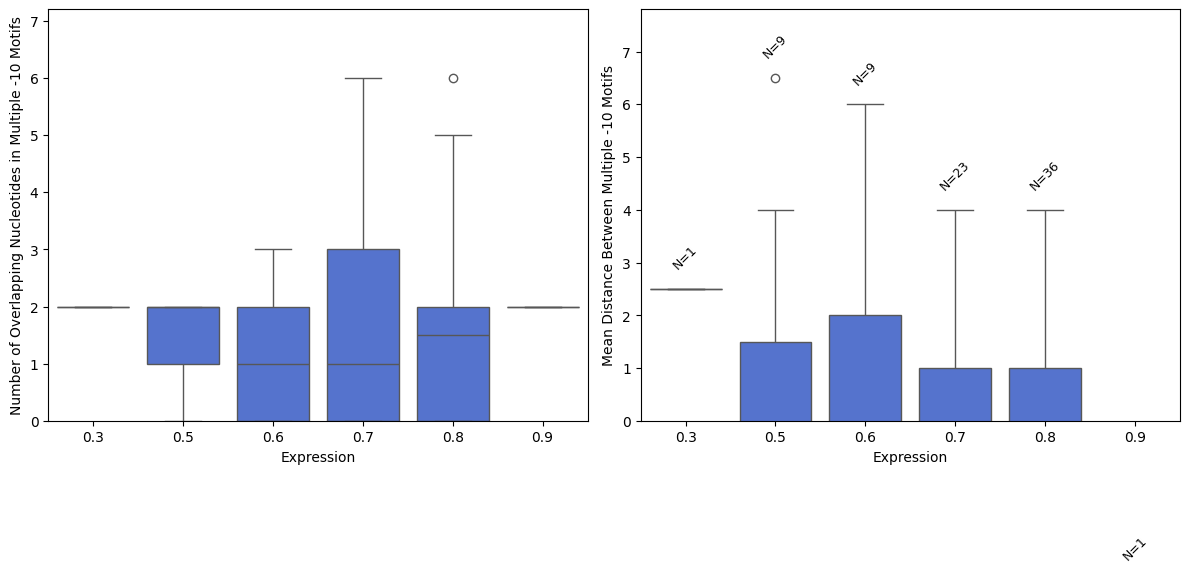

In [25]:
color_map  = {
    '35': 'orange',
    '10': 'royalblue',
}

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

filtered_df = consensus_count_df[consensus_count_df['num_multiple_h10'] > 0]

for i, metric in enumerate(['overlapping', 'distance_between']):
    sns.boxplot(
        data=filtered_df,
        x='prediction_bin',
        y=f'{metric}_h10',
        color=color_map['10'],
        ax=axes[i]
    )

    axes[i].set_xlabel('Expression')
    axes[i].set_ylabel(
        'Number of Overlapping Nucleotides in Multiple -10 Motifs' if metric == 'overlapping'
        else 'Mean Distance Between Multiple -10 Motifs'
    )
    axes[i].set_ylim(0, filtered_df[f'{metric}_h10'].max() * 1.2)

    if metric == 'distance_between':
        group_counts = filtered_df.groupby('prediction_bin', observed=False)[f'{metric}_h10'].count()
        for j, label in enumerate(group_counts.index):
            count = group_counts[label]
            y_max = filtered_df[filtered_df['prediction_bin'] == label][f'{metric}_h10'].max()
            if pd.isna(y_max):
                continue

            offset = filtered_df[f'{metric}_h10'].max() * 0.05
            axes[i].text(j, y_max + offset, f'N={count}', ha='center', va='bottom', rotation=45, fontsize=9)

plt.tight_layout()
plt.show()


In [26]:
# -10 motifs
high_expr = consensus_count_df[consensus_count_df['prediction'] > 0.8]
percent_h10_variant = (high_expr['near_consensus_h10_count'] > 0).mean() * 100
print(f"Percentage of high expression sequences with at least one -10 near consensus: {percent_h10_variant:.2f}%")

percent_consensus_h10 = (high_expr['consensus_h10_count'] > 0).mean() * 100
print(f"Percentage of high expression sequences with at least one -10 consensus: {percent_consensus_h10:.2f}%")

percent_multi_consensus_h10 = (high_expr['consensus_h10_count'] > 1).mean() * 100
print(f"Percentage of high expression sequences with more than one -10 consensus: {percent_multi_consensus_h10:.2f}%")

low_expr = consensus_count_df[consensus_count_df['prediction'] < 0.3]
percent_h10_variant = (low_expr['near_consensus_h10_count'] > 0).mean() * 100
print(f"Percentage of low expression sequences with at least one -10 near consensus: {percent_h10_variant:.2f}%")

med_low_expr = consensus_count_df[consensus_count_df['prediction'] < 0.5]
percent_h10_variant = (med_low_expr['consensus_h10_count'] > 0).sum()
print(f"Number of high expression sequences with at least one -10 consensus: {percent_h10_variant}")


# -35 motifs
high_expr = consensus_count_df[consensus_count_df['prediction'] > 0.8]
percent_h35_variant = (high_expr['near_consensus_h35_count'] > 0).mean() * 100
print(f"Percentage of high expression sequences with at least one -35 near consensus: {percent_h35_variant:.2f}%")

percent_h35_consensus = (high_expr['consensus_h35_count'] > 0).mean() * 100
print(f"Percentage of high expression sequences with at least one -35 near consensus: {percent_h35_consensus:.2f}%")

low_expr = consensus_count_df[consensus_count_df['prediction'] < 0.2]
percent_h35_variant = (low_expr['near_consensus_h35_count'] > 0).mean() * 100
print(f"Percentage of low expression sequences with at least one -35 near consensus: {percent_h35_variant:.2f}%")

percent_multiple_h35 = (consensus_count_df['near_consensus_h35_count'] > 1).mean() * 100
print(f"Percentage of high expression sequences with more than one -35 near consensus: {percent_multiple_h35:.2f}%")

Percentage of high expression sequences with at least one -10 near consensus: 97.56%
Percentage of high expression sequences with at least one -10 consensus: 87.80%
Percentage of high expression sequences with more than one -10 consensus: 39.02%
Percentage of low expression sequences with at least one -10 near consensus: 2.94%
Number of high expression sequences with at least one -10 consensus: 1
Percentage of high expression sequences with at least one -35 near consensus: 82.93%
Percentage of high expression sequences with at least one -35 near consensus: 41.46%
Percentage of low expression sequences with at least one -35 near consensus: 40.00%
Percentage of high expression sequences with more than one -35 near consensus: 0.47%


### Comparing consensus to LaFleur Supp distribution
---

In [27]:
from sklearn.preprocessing import MinMaxScaler

LaFleur_supp_df = pd.read_csv('Data/LaFleur_supp.csv')

LaFleur_supp_df['expression'] = MinMaxScaler().fit_transform(LaFleur_supp_df[['Observed log(TX/Txref)']].abs())
LaFleur_supp_df['expression_bin'] = pd.cut(LaFleur_supp_df['expression'], bins=bins, labels=labels)

LaFleur_supp_df.rename(columns={'Promoter Sequence': 'sequence', 'File Name': 'dataset'}, inplace=True)
LaFleur_supp_df = LaFleur_supp_df[['sequence', 'expression', 'expression_bin', 'dataset']]

In [28]:
from sklearn.model_selection import train_test_split

LaFleur_supp_df = LaFleur_supp_df.dropna()

train_df, test_df = train_test_split(
    LaFleur_supp_df,
    test_size=0.2,
    random_state=42,
    stratify=LaFleur_supp_df['expression_bin']
)

In [29]:
bins = np.linspace(0, 1, 11)
labels = [f"{b:.1f}" for b in bins[:-1]]

train_df['expression_bin'] = pd.cut(train_df['expression'], bins=bins, labels=labels, include_lowest=True)

# near consensus
train_df['near_consensus_h35_count'] = train_df['sequence'].apply(
    lambda x: count_motifs_occurance(x, targets['-35'], min_shared=5)
)
train_df['near_consensus_h10_count'] = train_df['sequence'].apply(
    lambda x: count_motifs_occurance(x, targets['-10'], min_shared=5)
)

# consensus
train_df['consensus_h35_count'] = train_df['sequence'].apply(
    lambda x: count_motifs_occurance(x, targets['-35'], min_shared=6)
)
train_df['consensus_h10_count'] = train_df['sequence'].apply(
    lambda x: count_motifs_occurance(x, targets['-10'], min_shared=6)
)

# Count multiple occurances
train_df['num_multiple_h35'] = train_df.apply(
    lambda row: row['near_consensus_h35_count'] if row['near_consensus_h35_count'] > 1 else 0,
    axis=1
)
train_df['num_multiple_h10'] = train_df.apply(
    lambda row: row['near_consensus_h10_count'] if row['near_consensus_h10_count'] > 1 else 0,
    axis=1
)

# Calculate overlapping nucleotides and distances
train_df['overlapping_h35'] = train_df['sequence'].apply(
    lambda x: overlapping_nucleotides_in_motifs(x, targets['-35'], min_shared=5)
)
train_df['overlapping_h10'] = train_df['sequence'].apply(
    lambda x: overlapping_nucleotides_in_motifs(x, targets['-10'], min_shared=5)
)

# Calculate distances between motifs
train_df['distance_between_h35'] = train_df['sequence'].apply(
    lambda x: distance_between_motifs(x, targets['-35'], min_shared=5)
)
train_df['distance_between_h10'] = train_df['sequence'].apply(
    lambda x: distance_between_motifs(x, targets['-10'], min_shared=5)
)

# Calculate spacer lengths 
train_df['mean_distance_between_h35_h10'] = train_df['sequence'].apply(
    lambda x: np.mean(distance_between_motif_pairs(x, targets['-35'], targets['-10'], min_shared=5)) 
    if distance_between_motif_pairs(x, targets['-35'], targets['-10'], min_shared=5) else np.nan
)

train_df = train_df.reset_index(drop=True)

train_df.head()

,sequence,expression,expression_bin,dataset,near_consensus_h35_count,near_consensus_h10_count,consensus_h35_count,consensus_h10_count,num_multiple_h35,num_multiple_h10,overlapping_h35,overlapping_h10,distance_between_h35,distance_between_h10,mean_distance_between_h35_h10
0,acctcgagcacgaggccaggcttcaaatctcaatgctattactgaa...,0.264607,0.2,Lagator et al 36N,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,gcgcccgctgatcctcctcgaggattgatatctaacaccgtgcgtg...,0.453386,0.4,Lagator et al Pr,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,ACTGGACGCGGAAGAGCGTGAAATACTGGCGCATCCGCTGGTGGGA...,0.075515,0.0,Urtecho et al,0,0,0,0,0,0,0,0,NaN,NaN,NaN
3,TTTTCTATCTACGTACTTGACACTATTTCCTATTTCTCTTATAATT...,0.290632,0.2,La Fleur et al,2,1,1,1,2,0,0,0,28.0,NaN,17.0
4,AATAAATTTTAAGGACCGTAGATTGACACTATTTCCTATTTCTCTG...,0.179008,0.1,La Fleur et al,1,0,1,0,0,0,0,0,NaN,NaN,NaN


In [30]:
train_df.to_csv('Data/LaFleur_train_sequence_analysis.csv', index=False)

In [31]:
train_df = pd.read_csv('Data/LaFleur_train_sequence_analysis.csv')

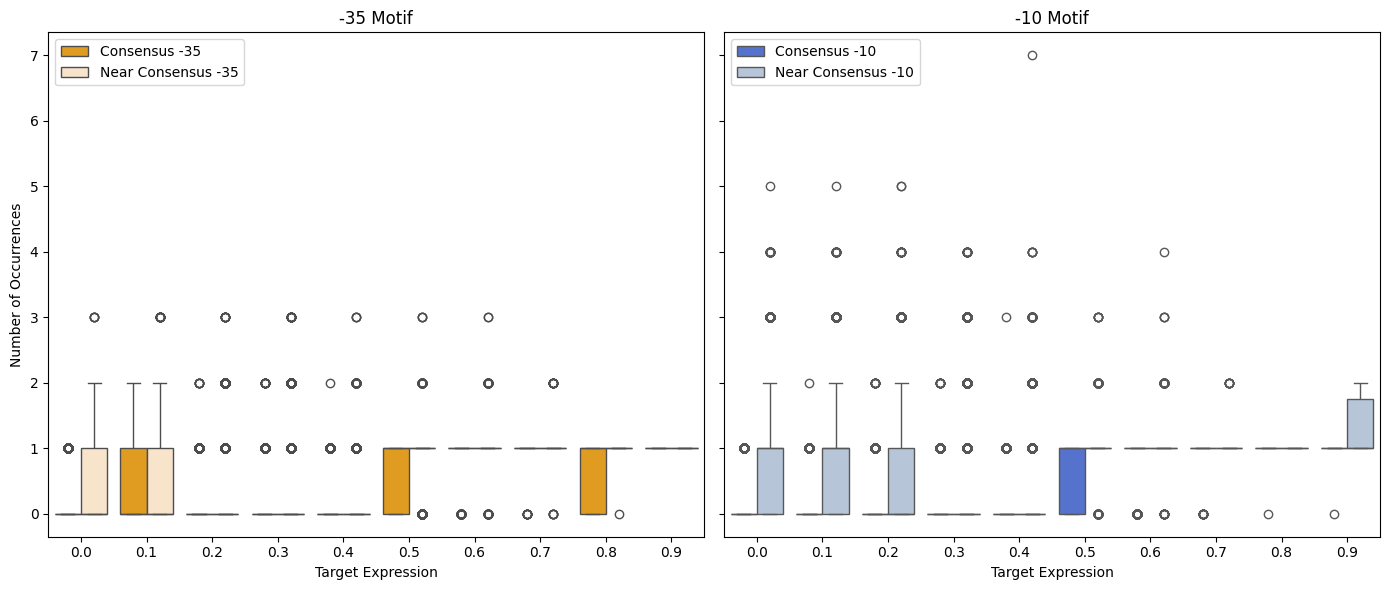

In [32]:
color_map  = {
    'Consensus -35': 'orange',
    'Near Consensus -35': 'bisque',
    'Consensus -10': 'royalblue',
    'Near Consensus -10': 'lightsteelblue',
}

plot_df = pd.DataFrame()

for motif in ['35', '10']:
    # Consensus
    temp_df = train_df[['expression_bin']].copy()
    temp_df['count'] = train_df[f'consensus_h{motif}_count'].values
    temp_df['Type'] = f'Consensus -{motif}'
    plot_df = pd.concat([plot_df, temp_df], ignore_index=True)

    # Near Consensus
    temp_df = train_df[['expression_bin']].copy()
    temp_df['count'] = train_df[f'near_consensus_h{motif}_count'].values
    temp_df['Type'] = f'Near Consensus -{motif}'
    plot_df = pd.concat([plot_df, temp_df], ignore_index=True)

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

for i, motif in enumerate(['35', '10']):
    subset = plot_df[plot_df['Type'].str.contains(f'-{motif}')]
    
    sns.boxplot(
        data=subset,
        x='expression_bin',
        y='count',
        hue='Type',
        palette={
            f'Consensus -{motif}': color_map[f'Consensus -{motif}'],
            f'Near Consensus -{motif}': color_map[f'Near Consensus -{motif}']
        },
        ax=axes[i]
    )

    axes[i].set_xlabel('Target Expression')
    axes[i].set_ylabel('Number of Occurrences')
    axes[i].set_title(f'-{motif} Motif')
    axes[i].legend(loc='upper left')

plt.tight_layout()
plt.show()


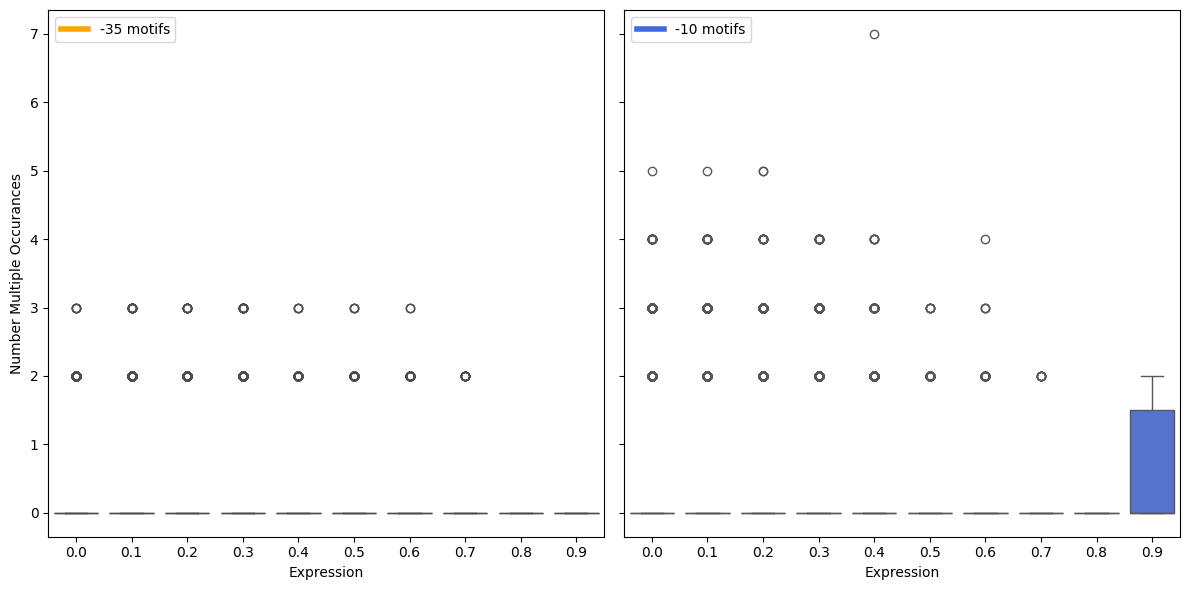

In [33]:
color_map  = {
    '35': 'orange',
    '10': 'royalblue',
}

bins = np.linspace(0, 1, 11)
labels = [f"{b:.1f}" for b in bins[:-1]]

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

for i, motif in enumerate(['35', '10']):
    sns.boxplot(
        data=train_df,
        x='expression_bin',
        y=f'num_multiple_h{motif}',    
        color=color_map[motif],
        ax=axes[i]
    )

    axes[i].set_xlabel('Expression')
    axes[i].set_ylabel('Number Multiple Occurances')

    axes[i].legend(
        handles=[plt.Line2D([0], [0], color=color_map[motif], lw=4)],
        labels=[f'-{motif} motifs'],
        loc='upper left'
    )

plt.tight_layout()
plt.show()


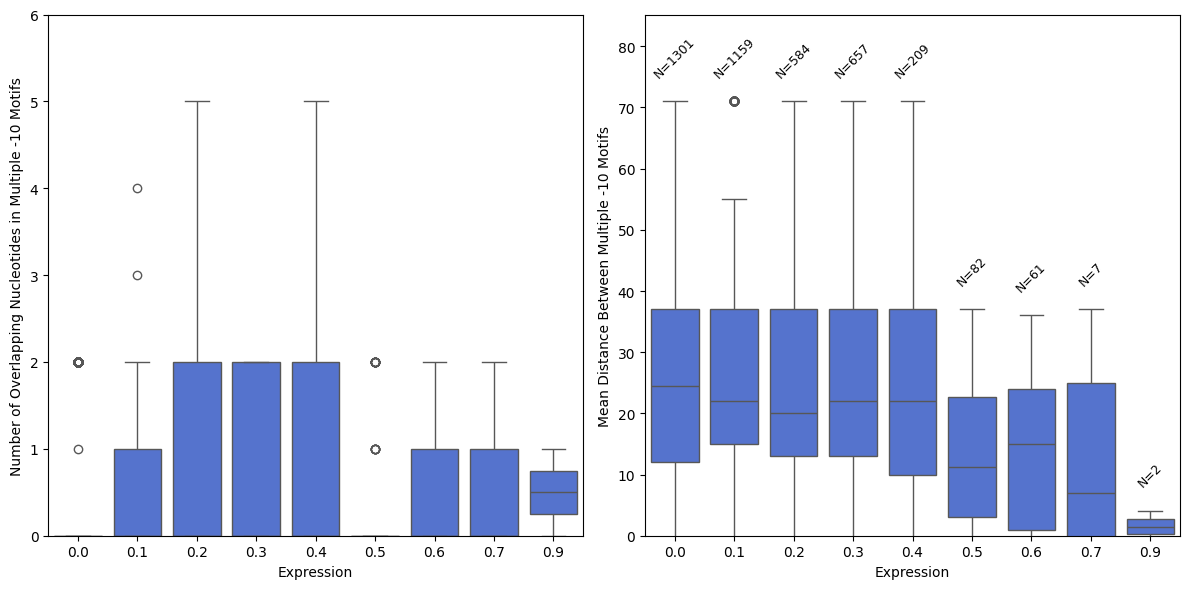

In [34]:
color_map  = {
    '35': 'orange',
    '10': 'royalblue',
}

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

filtered_df = train_df[train_df['num_multiple_h10'] > 0]

for i, metric in enumerate(['overlapping', 'distance_between']):
    sns.boxplot(
        data=filtered_df,
        x='expression_bin',
        y=f'{metric}_h10',
        color=color_map['10'],
        ax=axes[i]
    )

    axes[i].set_xlabel('Expression')
    axes[i].set_ylabel(
        'Number of Overlapping Nucleotides in Multiple -10 Motifs' if metric == 'overlapping'
        else 'Mean Distance Between Multiple -10 Motifs'
    )
    axes[i].set_ylim(0, filtered_df[f'{metric}_h10'].max() * 1.2)

    if metric == 'distance_between':
        group_counts = filtered_df.groupby('expression_bin', observed=False)[f'{metric}_h10'].count()
        for j, label in enumerate(group_counts.index):
            count = group_counts[label]
            y_max = filtered_df[filtered_df['expression_bin'] == label][f'{metric}_h10'].max()
            if pd.isna(y_max):
                continue

            offset = filtered_df[f'{metric}_h10'].max() * 0.05
            axes[i].text(j, y_max + offset, f'N={count}', ha='center', va='bottom', rotation=45, fontsize=9)

plt.tight_layout()
plt.show()


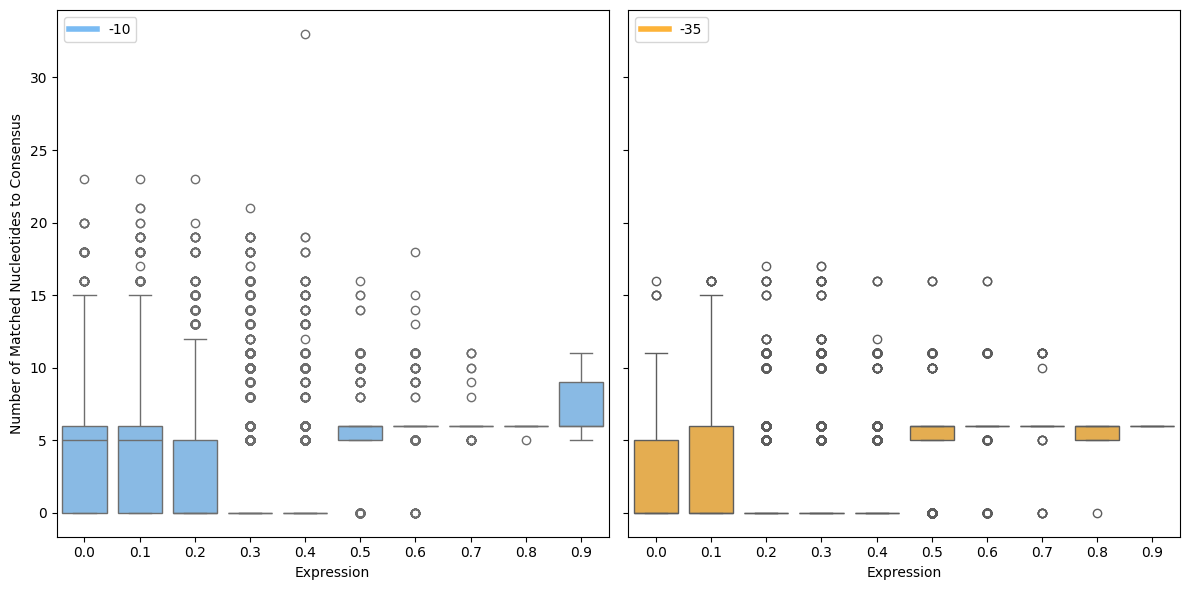

In [35]:
color_map  = {
    '35': '#FDB338',
    '10': '#7ABBF3',
}

train_df['h35_count'] = train_df['sequence'].apply(
    lambda x: count_matched_motifs(x, targets['-35'], min_shared=5)
)
train_df['h10_count'] = train_df['sequence'].apply(
    lambda x: count_matched_motifs(x, targets['-10'], min_shared=5)
)

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

for i, motif in enumerate(['10', '35']):
    sns.boxplot(
        data=train_df,
        x='expression_bin',
        y=f'h{motif}_count',
        color=color_map[motif],
        ax=axes[i]
    )

    axes[i].set_xlabel('Expression')
    axes[i].set_ylabel('Number of Matched Nucleotides to Consensus')
    
    axes[i].legend(
        handles=[plt.Line2D([0], [0], color=color_map[motif], lw=4)],
        labels=[f'-{motif}'],
        loc='upper left'
    )

plt.tight_layout()
plt.show()


In [36]:
def highlight_promoters(s, min_shared=5):
    targets = {
        "TTGACA": "\033[91m", # Red
        "TATAAT": "\033[92m", # Green
    }

    color_map = [("", c) for c in s]

    for i in range(len(s)):
        for target, color in targets.items():
            t_len = len(target)
            if i + t_len <= len(s):
                window = s[i:i + t_len]
                match_positions = [j for j in range(t_len) if window[j] == target[j]]
                if len(match_positions) >= min_shared:
                    for j in match_positions:
                        idx = i + j
                        if color_map[idx][0] == "":
                            color_map[idx] = (color, color_map[idx][1])

    result = ""
    for color, char in color_map:
        if color:
            result += f"{color}{char}\033[0m"
        else:
            result += char

    return result

# Load and preprocess the data
filter_df = train_df[train_df['num_multiple_h10'] > 1]

# plot the results
plt.figure(figsize=(10, 8))

for idx, row, in filter_df.sort_values(by='expression', ascending=False).head(10).iterrows():
    sequence = row['sequence']
    prediction = row['expression']
    highlighted_sequence = highlight_promoters(sequence, min_shared=5)
    print(highlighted_sequence, prediction)


GGCGCTCGTTCTAACAGTAGTTGACAACCCTTCAATAATGCCGTATAATTACCTACCGGGGCCGCCGACATAAGACCA 0.908239200430046
GCGCCTCATCCATGCTGCCGTTGACAAATGTTGGCCGTTATGTTATAATGTAATTCCTCGTCTTCATTACCTGAGTGA 0.9037936158141154
TTTGTCCGTGTATGATAGATTTGACAGACGGCTAGGGTCTCTTTATAATTCTCCTCCCGGCTCTCTGATCAAGGTGAC 0.7475056469534185
TACAACTTTTGTTTCGGATATTGACTGGCAGCTGGCACCGTTACATAATAATTCACCCTGCGGGGGCCGGGAAACATG 0.7400235011903216
TATACTTTTTCGTAAGCGGCTTGACATTAAACAGTACGTAAGATATAATTTACTCCCTATTCTGCCTTAGTTGGGAGG 0.7326151005214236
ATGTGTCTCATTGTGGGGGTTTGACAATTACGCGGTTTATTAGTATCATTATGCTCCATAATCACAAAACTGCTAGGC 0.7155852959967676
CTCCCGACTTCCCATGAGAATTGACAGCGCACCCTAGATAATTTATAATCGAGAGCCTTTCAATAAACTGGCATCGAT 0.7154135535745929
ATAGATTTTCGCCTTATGATTTGACATTAGAGTGTGTCGTAGGTAGAATCCCCCACCAAGAATCAAATACTCGTCGGT 0.7150998923596177
ATAAAGGAGAAGCACGTTCATTGACAACCGTGCCTTCCGGACTTATAATAATACTCCATCTAGGCTCCCTACTAAGTT 0.7134406696361315
CTAAGGGTAGTCGACAGGCGTTGACAGCCCCGGCGACATTTTCTATAATAGAAGTCCGGATGTGAATAATGATTAATT 0.6978804916256873


<Figure size 1000x800 with 0 Axes>

In [37]:
def highlight_promoters(s, min_shared=5):
    targets = {
        "TTGACA": "\033[91m", # Red
        "TATAAT": "\033[92m", # Green
    }

    color_map = [("", c) for c in s]

    for i in range(len(s)):
        for target, color in targets.items():
            t_len = len(target)
            if i + t_len <= len(s):
                window = s[i:i + t_len]
                match_positions = [j for j in range(t_len) if window[j] == target[j]]
                if len(match_positions) >= min_shared:
                    for j in match_positions:
                        idx = i + j
                        if color_map[idx][0] == "":
                            color_map[idx] = (color, color_map[idx][1])

    result = ""
    for color, char in color_map:
        if color:
            result += f"{color}{char}\033[0m"
        else:
            result += char

    return result

# Load and preprocess the data
filter_df = train_df[train_df['h10_count'] > 15]

# plot the results
plt.figure(figsize=(10, 8))

for idx, row, in filter_df.sort_values(by='expression', ascending=False).head(10).iterrows():
    sequence = row['sequence']
    prediction = row['expression']
    highlighted_sequence = highlight_promoters(sequence, min_shared=5)
    print(highlighted_sequence, prediction)

print('...')

for idx, row, in filter_df.sort_values(by='expression', ascending=False).tail(10).iterrows():
    sequence = row['sequence']
    prediction = row['expression']
    highlighted_sequence = highlight_promoters(sequence, min_shared=5)
    print(highlighted_sequence, prediction)


ACGCCATTTATGGATGAATGTTGACAGGTATGATGTTCCGTTGTCTAATAAGAAGCCACGGTATGATAATAGTCGGCT 0.6519365331635091
GGATCCATATATATATATATATATATATATATTGACACCATTATCATTACCTGGTATAATCGCACGGAATTC 0.5304041850840882
CTGCGGAAGTGGTCTTGATTTTGACAAGAGCCTATACTGCCCATATAATTCCGTCCCTTGCGATAACTTGGAATAATT 0.4997353497497636
GGATCCTTTGACATATATATAATTTGACAATATAATCACACATTTATTATTATGCATATTATAATAGAATTC 0.4945409126809758
AGCCGCTTTTAGCGGACGACGTGAGTAAACAAAACCCAGACATCATGGATAATGGCTGGGGAAAATATATTTTTCAAAAGTATGCTTGACATTTCCATTAGCGAGTATAATAATCGCCGGAAACAAAACTGGCTTCTGGCCCTGCTAACC 0.4516093864334446
AGCCGCTTTTAGCGGACGACGTGAGTAAACAAAACCCAGACATCATGGATAATGGCTGGGGAAAATATATTTTTCAAAAGTATGCTTGACATTTCCATTAGCGAGTATGATAATCGCCGGAAACAAAACTGGCTTCTGGCCCTGCTAACC 0.4398588834364658
AGCCGCTTTTAGCGGACGACGTGAGTAAACAAAACCCAGACATCATGGATAATGGCTGGGGAAAATATATTTTTCAAAAGTATGCTTGCAATGGCTGAATGGTCTGTCTATAATCGCCGGAAACAAAACTGGCTTCTGGCCCTGCTAACC 0.4296491558183805
AGCCGCTTTTAGCGGACGACGTGAGTAAACAAAACCCAGACATCATGGATAATGGCTGGGGAAAATATATTTTTCAAAAGTATGCTTGACATGGCTGAATGGTCTGTCTA

<Figure size 1000x800 with 0 Axes>

In [38]:
def highlight_promoters(s, min_shared=5):
    targets = {
        "TTGACA": "\033[91m", # Red
        "TATAAT": "\033[92m", # Green
    }

    color_map = [("", c) for c in s]

    for i in range(len(s)):
        for target, color in targets.items():
            t_len = len(target)
            if i + t_len <= len(s):
                window = s[i:i + t_len]
                match_positions = [j for j in range(t_len) if window[j] == target[j]]
                if len(match_positions) >= min_shared:
                    for j in match_positions:
                        idx = i + j
                        if color_map[idx][0] == "":
                            color_map[idx] = (color, color_map[idx][1])

    result = ""
    for color, char in color_map:
        if color:
            result += f"{color}{char}\033[0m"
        else:
            result += char

    return result

# Load and preprocess the data
filter_df = train_df[train_df['expression'] > 0.8]

# plot the results
plt.figure(figsize=(10, 8))

for idx, row, in filter_df.sort_values(by='expression').iterrows():
    sequence = row['sequence']
    prediction = row['expression']
    highlighted_sequence = highlight_promoters(sequence, min_shared=5)
    print(highlighted_sequence, prediction)

print()


ACTCAATTTATTCTAGCAATTTGACAACCGCTGCGAGAACTTCTATAATCGAAGACCAAATTTGGAGAGTAGCAAAGA 0.8086877838441857
AGACCATCCCGCGCTCAGATTTGACAATGCTCGCTGCTGGCTTTATAATTGTTGGCCTCTAGGTCGTATACGTACTAA 0.8338353154695906
TCTACGTGCCCTCATAACCATTGACAGACTCCACGGGAAATCCTATAATTTAAAACCTGAGATGATAAGACTTCGAGT 0.8444524768551366
GCGCTGTTTGGTAGACGGTCTTGCGAGGTCCGCACCATAGTGATACAATGGGTGTCCCGGGCTCGTCTAAGCACCGAT 0.8521264945031304
GCGCCTGTGATCCCTCATTCTTGATATGCCGGGTCTAAAACTGTATAATCGTTTACCTCTGCTACGTAGTTGATCCAA 0.8916033205843823
GCGCCTCATCCATGCTGCCGTTGACAAATGTTGGCCGTTATGTTATAATGTAATTCCTCGTCTTCATTACCTGAGTGA 0.9037936158141154
GGCGCTCGTTCTAACAGTAGTTGACAACCCTTCAATAATGCCGTATAATTACCTACCGGGGCCGCCGACATAAGACCA 0.908239200430046
CGCGCTCCGCTGATATAGACTTGACAAACCGTAAGACAAAAGCTACAATCTCGTACCGGAGACTCGTTTGGGACAAGT 0.95333119515685
GCGCACATCCGACCGCTGTCTTGACAGTCGAAGTCATATCCTTTATAATTTTGGTCCAATCGTACTAGGGCAGTATTC 0.9609934598964072
GCGCCAGACAATTTCTGTATTTGACAAATCTGATGCTACGAAGTATAATCTACTTCCGGCCCGGTTACGGTTAACGAA 0.9617862634827656
GCGCTGAATCACCGATTCGGTTG

<Figure size 1000x800 with 0 Axes>

### Comparison between GA and LaFleur 

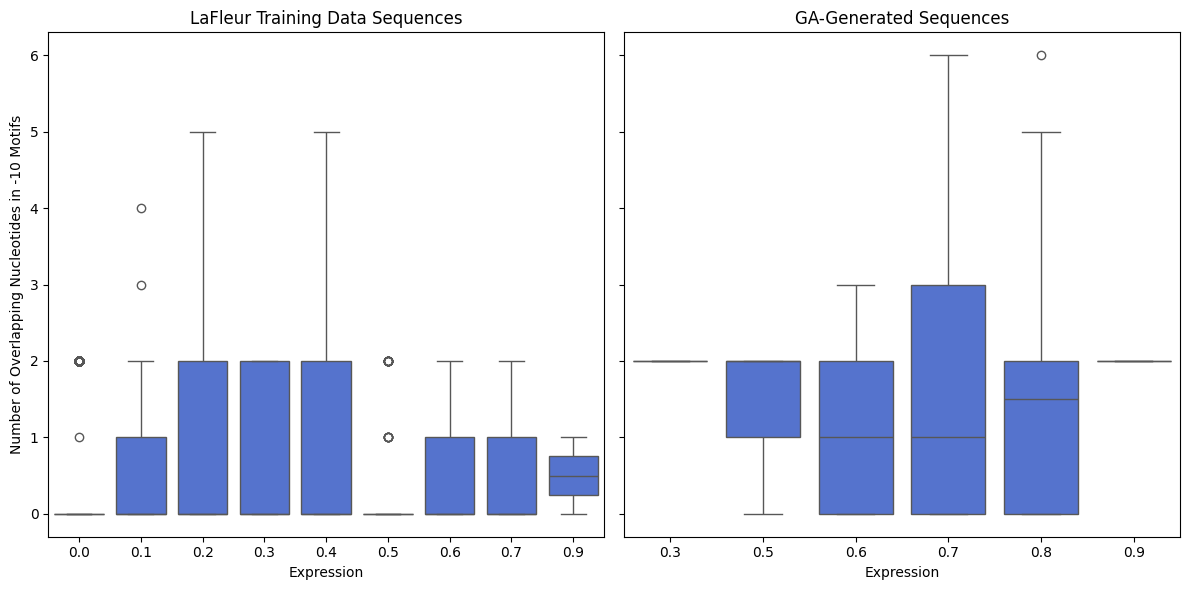

In [39]:
color_map  = {
    '35': 'orange',
    '10': 'royalblue',
}

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

filtered_train = train_df[train_df['num_multiple_h10'] > 0]
filtered_consensus = consensus_count_df[consensus_count_df['num_multiple_h10'] > 0]

sns.boxplot(
    data=filtered_train,
    x='expression_bin',
    y='overlapping_h10',
    color=color_map['10'],
    ax=axes[0]
)
axes[0].set_title('LaFleur Training Data Sequences')
axes[0].set_xlabel('Expression')
axes[0].set_ylabel('Number of Overlapping Nucleotides in -10 Motifs')

sns.boxplot(
    data=filtered_consensus,
    x='prediction_bin',
    y='overlapping_h10',
    color=color_map['10'],
    ax=axes[1]
)
axes[1].set_title('GA-Generated Sequences')
axes[1].set_xlabel('Expression')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()


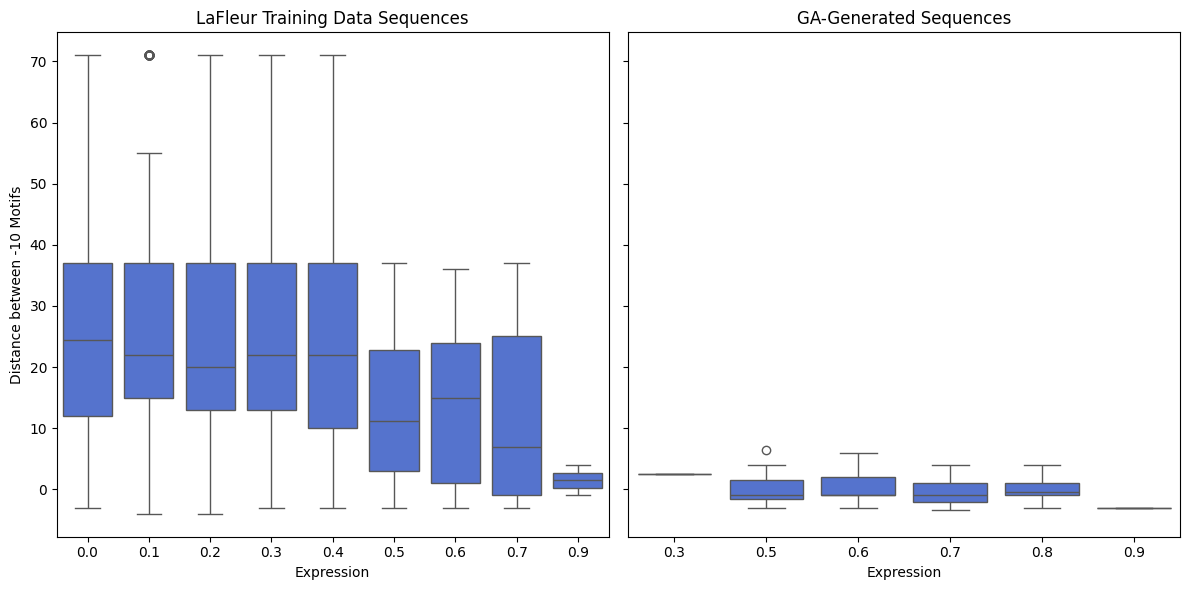

In [40]:
color_map  = {
    '35': 'orange',
    '10': 'royalblue',
}

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

filtered_train = train_df[train_df['num_multiple_h10'] > 0]
filtered_consensus = consensus_count_df[consensus_count_df['num_multiple_h10'] > 0]

sns.boxplot(
    data=filtered_train,
    x='expression_bin',
    y='distance_between_h10',
    color=color_map['10'],
    ax=axes[0]
)
axes[0].set_title('LaFleur Training Data Sequences')
axes[0].set_xlabel('Expression')
axes[0].set_ylabel('Distance between -10 Motifs')

sns.boxplot(
    data=filtered_consensus,
    x='prediction_bin',
    y='distance_between_h10',
    color=color_map['10'],
    ax=axes[1]
)
axes[1].set_title('GA-Generated Sequences')
axes[1].set_xlabel('Expression')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()


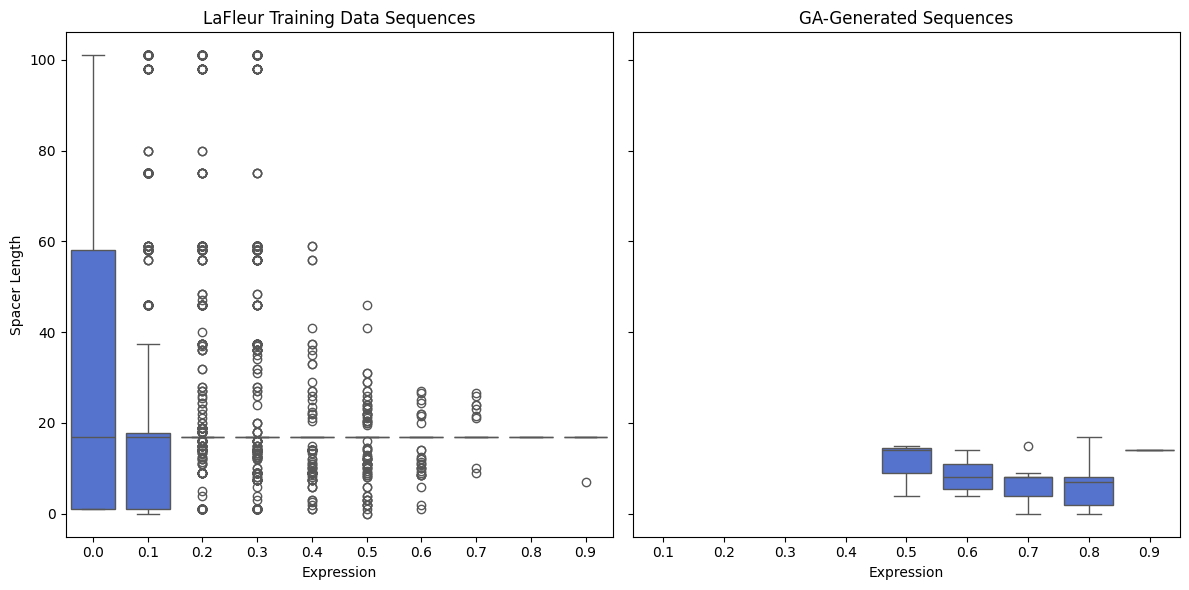

In [41]:
color_map  = {
    '35': 'orange',
    '10': 'royalblue',
}

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

sns.boxplot(
    data=train_df,
    x='expression_bin',
    y='mean_distance_between_h35_h10',
    color=color_map['10'],
    ax=axes[0]
)
axes[0].set_title('LaFleur Training Data Sequences')
axes[0].set_xlabel('Expression')
axes[0].set_ylabel('Spacer Length')

sns.boxplot(
    data=consensus_count_df,
    x='prediction_bin',
    y='mean_distance_between_h35_h10',
    color=color_map['10'],
    ax=axes[1]
)
axes[1].set_title('GA-Generated Sequences')
axes[1].set_xlabel('Expression')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()


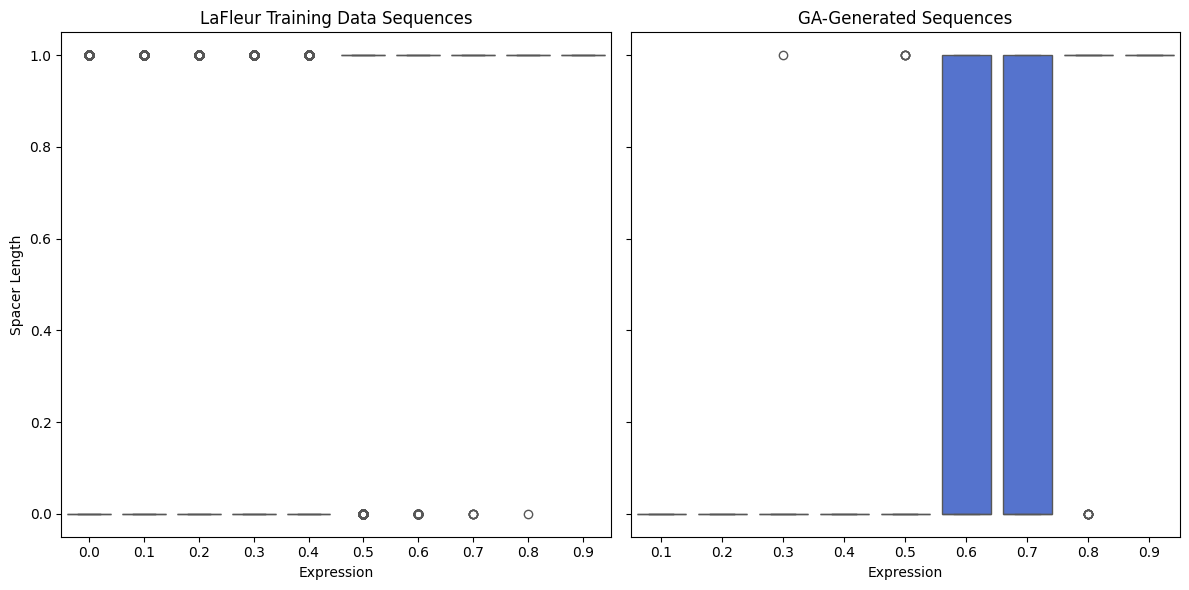

In [42]:
color_map  = {
    '35': 'orange',
    '10': 'royalblue',
}

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

temp_train_df = train_df.copy()
temp_consensus_count_df = consensus_count_df.copy()

temp_train_df['has_h35_and_h10'] = temp_train_df.apply(
    lambda row: 1 if row['near_consensus_h35_count'] > 0 and row['near_consensus_h10_count'] > 0 else 0,
    axis=1
)
temp_consensus_count_df['has_h35_and_h10'] = temp_consensus_count_df.apply(
    lambda row: 1 if row['near_consensus_h35_count'] > 0 and row['near_consensus_h10_count'] > 0 else 0,
    axis=1
)

sns.boxplot(
    data=temp_train_df,
    x='expression_bin',
    y='has_h35_and_h10',
    color=color_map['10'],
    ax=axes[0]
)
axes[0].set_title('LaFleur Training Data Sequences')
axes[0].set_xlabel('Expression')
axes[0].set_ylabel('Spacer Length')

sns.boxplot(
    data=temp_consensus_count_df,
    x='prediction_bin',
    y='has_h35_and_h10',
    color=color_map['10'],
    ax=axes[1]
)
axes[1].set_title('GA-Generated Sequences')
axes[1].set_xlabel('Expression')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()


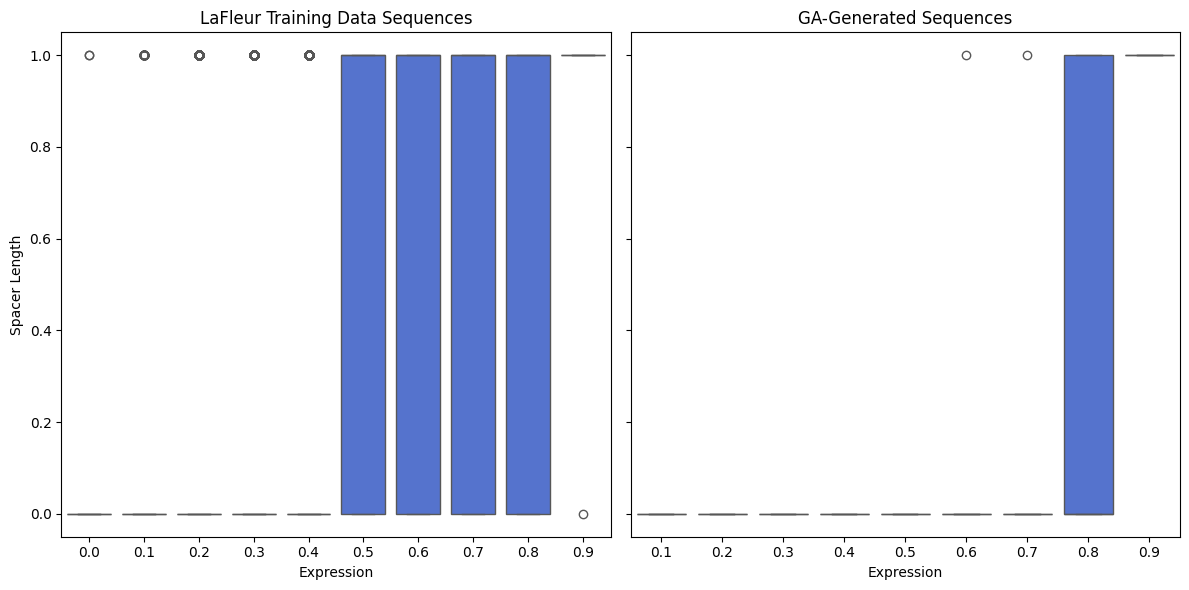

In [43]:
color_map  = {
    '35': 'orange',
    '10': 'royalblue',
}

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

temp_train_df = train_df.copy()
temp_consensus_count_df = consensus_count_df.copy()

temp_train_df['has_h35_and_h10'] = temp_train_df.apply(
    lambda row: 1 if row['consensus_h35_count'] > 0 and row['consensus_h10_count'] > 0 else 0,
    axis=1
)
temp_consensus_count_df['has_h35_and_h10'] = temp_consensus_count_df.apply(
    lambda row: 1 if row['consensus_h35_count'] > 0 and row['consensus_h10_count'] > 0 else 0,
    axis=1
)

sns.boxplot(
    data=temp_train_df,
    x='expression_bin',
    y='has_h35_and_h10',
    color=color_map['10'],
    ax=axes[0]
)
axes[0].set_title('LaFleur Training Data Sequences')
axes[0].set_xlabel('Expression')
axes[0].set_ylabel('Spacer Length')

sns.boxplot(
    data=temp_consensus_count_df,
    x='prediction_bin',
    y='has_h35_and_h10',
    color=color_map['10'],
    ax=axes[1]
)
axes[1].set_title('GA-Generated Sequences')
axes[1].set_xlabel('Expression')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()


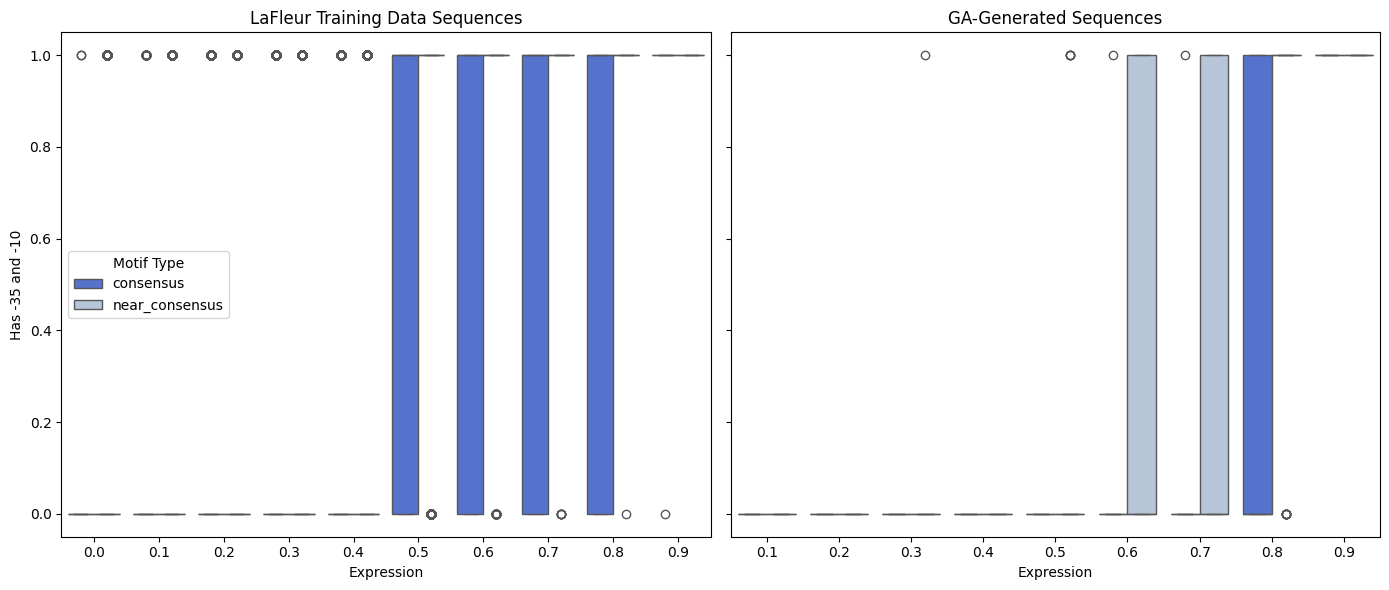

In [44]:
color_map  = {
    'consensus 35': 'orange',
    'near consensus 35': 'bisque',
    'consensus 10': 'royalblue',
    'near consensus 10': 'lightsteelblue',
}

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

temp_train_df = train_df.copy()
temp_consensus_count_df = consensus_count_df.copy()

temp_train_df['consensus'] = temp_train_df.apply(
    lambda row: 1 if row['consensus_h35_count'] > 0 and row['consensus_h10_count'] > 0 else 0,
    axis=1
)
temp_train_df['near_consensus'] = temp_train_df.apply(
    lambda row: 1 if row['near_consensus_h35_count'] > 0 and row['near_consensus_h10_count'] > 0 else 0,
    axis=1
)

temp_consensus_count_df['consensus'] = temp_consensus_count_df.apply(
    lambda row: 1 if row['consensus_h35_count'] > 0 and row['consensus_h10_count'] > 0 else 0,
    axis=1
)
temp_consensus_count_df['near_consensus'] = temp_consensus_count_df.apply(
    lambda row: 1 if row['near_consensus_h35_count'] > 0 and row['near_consensus_h10_count'] > 0 else 0,
    axis=1
)

train_melted = temp_train_df.melt(
    id_vars='expression_bin',
    value_vars=['consensus', 'near_consensus'],
    var_name='motif_type',
    value_name='has_h35_and_h10'
)

consensus_melted = temp_consensus_count_df.melt(
    id_vars='prediction_bin',
    value_vars=['consensus', 'near_consensus'],
    var_name='motif_type',
    value_name='has_h35_and_h10'
)

sns.boxplot(
    data=train_melted,
    x='expression_bin',
    y='has_h35_and_h10',
    hue='motif_type',
    palette={'consensus': color_map['consensus 10'], 'near_consensus': color_map['near consensus 10']},
    ax=axes[0]
)
axes[0].set_title('LaFleur Training Data Sequences')
axes[0].set_xlabel('Expression')
axes[0].set_ylabel('Has -35 and -10')
axes[0].legend(title='Motif Type')

sns.boxplot(
    data=consensus_melted,
    x='prediction_bin',
    y='has_h35_and_h10',
    hue='motif_type',
    palette={'consensus': color_map['consensus 10'], 'near_consensus': color_map['near consensus 10']},
    ax=axes[1]
)
axes[1].set_title('GA-Generated Sequences')
axes[1].set_xlabel('Expression')
axes[1].set_ylabel('')
axes[1].legend().set_visible(False)

plt.tight_layout()
plt.show()


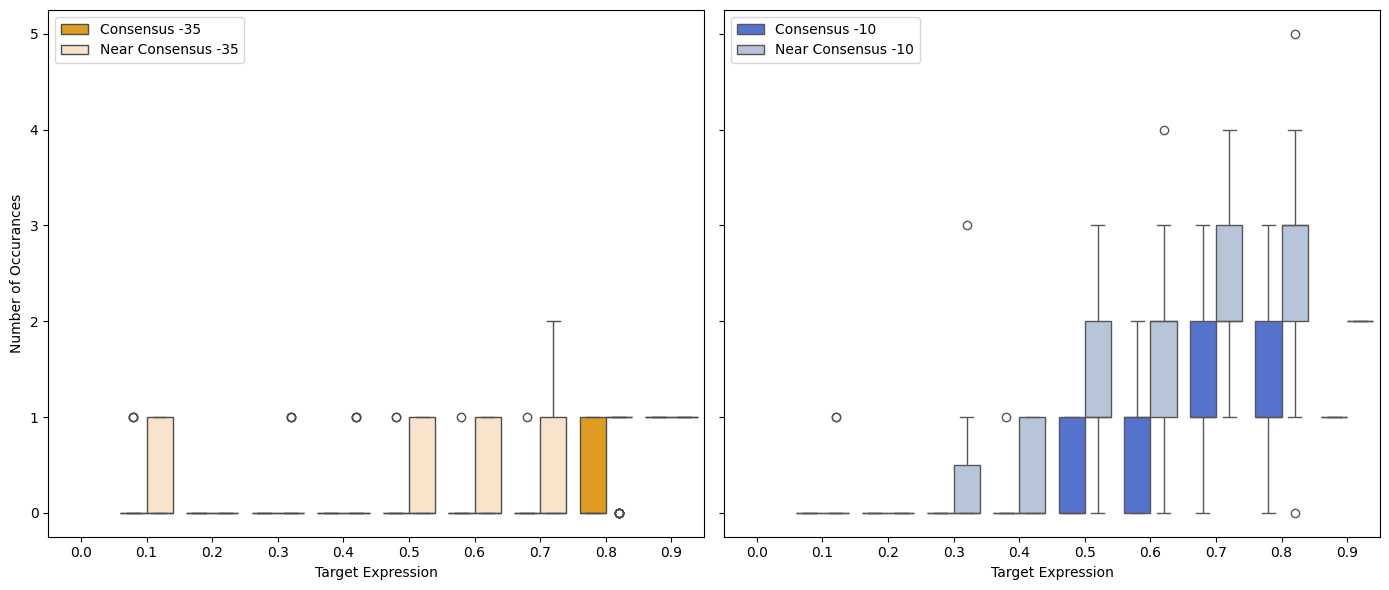

In [45]:
color_map  = {
    'consensus 35': 'orange',
    'near consensus 35': 'bisque',
    'consensus 10': 'royalblue',
    'near consensus 10': 'lightsteelblue',
}

consensus_count_df['prediction_bin'] = pd.cut(consensus_count_df['prediction'], bins=bins, labels=labels)

plot_df = pd.DataFrame()

for motif in ['35', '10']:
    temp_df = consensus_count_df[['prediction_bin']].copy()
    temp_df['count'] = consensus_count_df[f'consensus_h{motif}_count']
    temp_df['Type'] = f'Consensus -{motif}'
    plot_df = pd.concat([plot_df, temp_df])

    temp_df = consensus_count_df[['prediction_bin']].copy()
    temp_df['count'] = consensus_count_df[f'near_consensus_h{motif}_count']
    temp_df['Type'] = f'Near Consensus -{motif}'
    plot_df = pd.concat([plot_df, temp_df])

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

for i, motif in enumerate(['35', '10']):
    subset = plot_df[plot_df['Type'].str.contains(f'-{motif}')]
    sns.boxplot(
        data=subset,
        x='prediction_bin',
        y='count',
        hue='Type',
        palette={
            f'Consensus -{motif}': color_map[f'consensus {motif}'],
            f'Near Consensus -{motif}': color_map[f'near consensus {motif}']
        },
        ax=axes[i]
    )
    axes[i].set_xlabel('Target Expression')
    axes[i].set_ylabel('Number of Occurances')
    axes[i].legend(loc='upper left')

plt.tight_layout()
plt.show()


In [46]:
# Training data low expression spacer lengths
low_expr = train_df[train_df['expression'] < 0.2]
median_spacer_length = low_expr['mean_distance_between_h35_h10'].median()
mean_spacer_length = low_expr['mean_distance_between_h35_h10'].mean()
std_spacer_length = low_expr['mean_distance_between_h35_h10'].std()
rsd_spacer_length = (std_spacer_length / mean_spacer_length) * 100

print(f"Median Spacer Length in Low Expression Sequences: {median_spacer_length:.2f}")
print(f"Mean Spacer Length in Low Expression Sequences: {mean_spacer_length:.2f}")
print(f"Standard Deviation of Spacer Lengths in Low Expression Sequences: {std_spacer_length:.2f}")
print(f"RSD of Spacer Length in Low Expression Sequences: {rsd_spacer_length:.2f}%")
print()

# Training data medium to high expression spacer lengths
high_expr = train_df[train_df['expression'] > 0.7]
median_spacer_length = high_expr['mean_distance_between_h35_h10'].median()
mean_spacer_length = high_expr['mean_distance_between_h35_h10'].mean()
std_spacer_length = high_expr['mean_distance_between_h35_h10'].std()
rsd_spacer_length = (std_spacer_length / mean_spacer_length) * 100

print(f"Median Spacer Length above Low Expression Sequences: {median_spacer_length:.2f}")
print(f"Mean Spacer Length above Low Expression Sequences: {mean_spacer_length:.2f}")
print(f"Standard Deviation of Spacer Lengths above Low Expression Sequences: {std_spacer_length:.2f}")
print(f"RSD of Spacer Length above Low Expression Sequences: {rsd_spacer_length:.2f}%")
print()

# GA data low to medium expression spacer lengths
low_medium_expr = consensus_count_df[consensus_count_df['prediction'] < 0.5]
percent_NaN_spacer_length = 100 - ((low_medium_expr['mean_distance_between_h35_h10'].isna()).mean() * 100)
print(f"Percentage of low-medium expression GA Sequences with NaN Spacer Lengths: {percent_NaN_spacer_length:.2f}%")

# GA data high expression spacer lengths
high_expr = consensus_count_df[consensus_count_df['prediction'] > 0.8]
percent_NaN_spacer_length = 100 - ((high_expr['mean_distance_between_h35_h10'].isna()).mean() * 100)
print(f"Percentage of low-medium expression GA Sequences with NaN Spacer Lengths: {percent_NaN_spacer_length:.2f}%")

Median Spacer Length in Low Expression Sequences: 17.00
Mean Spacer Length in Low Expression Sequences: 31.05
Standard Deviation of Spacer Lengths in Low Expression Sequences: 34.08
RSD of Spacer Length in Low Expression Sequences: 109.75%

Median Spacer Length above Low Expression Sequences: 17.00
Mean Spacer Length above Low Expression Sequences: 17.28
Standard Deviation of Spacer Lengths above Low Expression Sequences: 2.67
RSD of Spacer Length above Low Expression Sequences: 15.44%

Percentage of low-medium expression GA Sequences with NaN Spacer Lengths: 0.00%
Percentage of low-medium expression GA Sequences with NaN Spacer Lengths: 80.49%


### Consensus needs supporting structure
---

In [47]:
high_expr_consensus_h10_df = consensus_count_df[
    (consensus_count_df['h10_count'] == 5)
]

# plot the results
plt.figure(figsize=(10, 8))

for idx, row, in high_expr_consensus_h10_df.sort_values(by='prediction', ascending=False).iterrows():
    sequence = row['sequence']
    prediction = row['prediction']
    highlighted_sequence = highlight_promoters(sequence, min_shared=5)
    print(highlighted_sequence, prediction)

AATACTAGAGGTCTTCCGACTTGACAAAACGGTTAAATTTATGTACAATGGTGTGGGCGGGAAGACAACTAGGGG 0.80654
AATACTAGAGGTCTTCCGACTTGACAAAAAGGTTAAATTTATGTACAATGGTGTGGGCGGGAAGACAACTAGGGG 0.8002981
AATACTAGAGGTCTTCCGACAAACTAGGTATATTACGATATAGAGCAAATGTGTGGGCGGGAAGACAACTAGGGG 0.60006666
AATACTAGAGGTCTTCCGACAAATAACTCGATTGATAATGTTGAATCAATGTGTGGGCGGGAAGACAACTAGGGG 0.600036
AATACTAGAGGTCTTCCGACACTCAACCTCGGATATTCTTTAATATCCGAGTGTGGGCGGGAAGACAACTAGGGG 0.6000034
AATACTAGAGGTCTTCCGACTTACTATCTATAAATTAACTCAGCAGTGTAGTGTGGGCGGGAAGACAACTAGGGG 0.60000324
AATACTAGAGGTCTTCCGACTTGAAAAACCTGAAAAATTATATAAGTTTAGTGTGGGCGGGAAGACAACTAGGGG 0.59999305
AATACTAGAGGTCTTCCGACAAGGGGTAACATTGATAATAGGGAAGGTCTGTGTGGGCGGGAAGACAACTAGGGG 0.59998673
AATACTAGAGGTCTTCCGACCCGCAACCTATAAATATTTCTATTGCCTATGTGTGGGCGGGAAGACAACTAGGGG 0.5000222
AATACTAGAGGTCTTCCGACACTGCGGCTATATTACACCTTAAAGCGAGTGTGTGGGCGGGAAGACAACTAGGGG 0.500022
AATACTAGAGGTCTTCCGACATGATTCTTTTATTATTAGATCCGCTATACGTGTGGGCGGGAAGACAACTAGGGG 0.50001955
AATACTAGAGGTCTTCCGACAGTATTGCTATATTCAAATTTAAAGGGTCCGTG

<Figure size 1000x800 with 0 Axes>

In [48]:
high_expr_consensus_h10_df = consensus_count_df[
    (consensus_count_df['h10_count'] == 6)
]

# plot the results
plt.figure(figsize=(10, 8))

for idx, row, in high_expr_consensus_h10_df.sort_values(by='prediction', ascending=False).iterrows():
    sequence = row['sequence']
    prediction = row['prediction']
    highlighted_sequence = highlight_promoters(sequence, min_shared=5)
    print(highlighted_sequence, prediction)

AATACTAGAGGTCTTCCGACTTGACAAAGAATTCTTATGCTATAATCAATGTGTGGGCGGGAAGACAACTAGGGG 0.84536195
AATACTAGAGGTCTTCCGACTGACAAACCGGTTTATTCTATATAATAAATGTGTGGGCGGGAAGACAACTAGGGG 0.7998533
AATACTAGAGGTCTTCCGACAAACGAGTATGCTATAATTGGTATAGACGGGTGTGGGCGGGAAGACAACTAGGGG 0.7000203
AATACTAGAGGTCTTCCGACTTGACTCCTTTTGCTTAATGTATAATCTTAGTGTGGGCGGGAAGACAACTAGGGG 0.6999946
AATACTAGAGGTCTTCCGACTTGACACAGTAATATAATTTGTGTAAATCGGTGTGGGCGGGAAGACAACTAGGGG 0.6999317
AATACTAGAGGTCTTCCGACCCACCTTTCCGACTAAGTTTTATAATAGCCGTGTGGGCGGGAAGACAACTAGGGG 0.600001
AATACTAGAGGTCTTCCGACTGACAAACACGGCACCGAGTTATAATTAATGTGTGGGCGGGAAGACAACTAGGGG 0.5999992
AATACTAGAGGTCTTCCGACTTCACTAATGGGTTATAATATATATGTCAGGTGTGGGCGGGAAGACAACTAGGGG 0.5999971
AATACTAGAGGTCTTCCGACTTTTGATTGCTATAATGAGTGCAAATAACTGTGTGGGCGGGAAGACAACTAGGGG 0.59998995
AATACTAGAGGTCTTCCGACACGTAACGTGATCCTAAAGTTTGTATAATTGTGTGGGCGGGAAGACAACTAGGGG 0.49999654


<Figure size 1000x800 with 0 Axes>

In [49]:
print(len('AAACGGTTAAATTTATG'))
print(len('AACCGGTTTATTCTA'))

17
15


In [50]:
sequences = [
    'AATACTAGAGGTCTTCCGACTTGACAAAACGGTTAAATTTATGTACAATGGTGTGGGCGGGAAGACAACTAGGGG', # original variant
    'AATACTAGAGGTCTTCCGACTTGACAAAACGGTTAAATTTATGTATAATGGTGTGGGCGGGAAGACAACTAGGGG', # variant with consensus (at variant position)
    'AATACTAGAGGTCTTCCGACTTGACAAAACGGTTAAATTTTATAATAAAGGTGTGGGCGGGAAGACAACTAGGGG', # variant with consensus (at consensus position)

    'AATACTAGAGGTCTTCCGACTGACAAACCGGTTTATTCTATATAATAAATGTGTGGGCGGGAAGACAACTAGGGG', # original consensus
    'AATACTAGAGGTCTTCCGACTGACAAACCGGTTTATTCTATACAATAAATGTGTGGGCGGGAAGACAACTAGGGG', # consensus with variant (at consensus position)
    'AATACTAGAGGTCTTCCGACTGACAAACCGGTTTATTCTAATGTACAATTGTGTGGGCGGGAAGACAACTAGGGG', # consensus with variant (at variant position)
] 

predictions = cnn.predict(cnn.preprocess(sequences))

for seq, pred in zip(sequences, predictions):
    highlighted_sequence = highlight_promoters(seq, min_shared=5)
    print(highlighted_sequence, pred)

AATACTAGAGGTCTTCCGACTTGACAAAACGGTTAAATTTATGTACAATGGTGTGGGCGGGAAGACAACTAGGGG 0.80654
AATACTAGAGGTCTTCCGACTTGACAAAACGGTTAAATTTATGTATAATGGTGTGGGCGGGAAGACAACTAGGGG 0.7911545
AATACTAGAGGTCTTCCGACTTGACAAAACGGTTAAATTTTATAATAAAGGTGTGGGCGGGAAGACAACTAGGGG 0.8017184
AATACTAGAGGTCTTCCGACTGACAAACCGGTTTATTCTATATAATAAATGTGTGGGCGGGAAGACAACTAGGGG 0.7998533
AATACTAGAGGTCTTCCGACTGACAAACCGGTTTATTCTATACAATAAATGTGTGGGCGGGAAGACAACTAGGGG 0.7481035
AATACTAGAGGTCTTCCGACTGACAAACCGGTTTATTCTAATGTACAATTGTGTGGGCGGGAAGACAACTAGGGG 0.66866344


In [51]:
# plot the results
plt.figure(figsize=(10, 8))

for seq, pred in zip(sequences, predictions):
    highlighted_sequence = highlight_promoters(seq[20:50], min_shared=5)
    print(highlighted_sequence, pred)

TTGACAAAACGGTTAAATTTATGTACAATG 0.80654
TTGACAAAACGGTTAAATTTATGTATAATG 0.7911545
TTGACAAAACGGTTAAATTTTATAATAAAG 0.8017184
TGACAAACCGGTTTATTCTATATAATAAAT 0.7998533
TGACAAACCGGTTTATTCTATACAATAAAT 0.7481035
TGACAAACCGGTTTATTCTAATGTACAATT 0.66866344


<Figure size 1000x800 with 0 Axes>

In [52]:
print(predictions[0] - predictions[1])
print(predictions[0] - predictions[2])
print()
print(predictions[3] - predictions[4])
print(predictions[3] - predictions[5])

0.015385509
0.0048215985

0.051749825
0.13118988


In [ ]:
# generating more promoters using the consensus -10 location

consensus_h10_data = {
    'target_expression': [],
    'sequence': [],
    'prediction': [],
    'error': [],
    'h35_count': [],
    'h10_count': [],
    'consensus_h35_count': [],
    'consensus_h10_count': [],
}

target_expression = 1
iterations = 20

for i in range(iterations):
    
    print(f"{i} / {iterations}                                       ", end='\r')
    ga = GeneticAlgorithm(
        cnn_model_path= 'Models/CNN_6_1_2.keras',
        target_expression=target_expression,
        masked_sequence= 'AATACTAGAGGTCTTCCGACNNNNNNNNNNNNNNNNNNNNTATAATNNNNGTGTGGGCGGGAAGACAACTAGGGG',
        early_stopping_patience= 100,
        seed=i,
    )
    best_sequence, best_prediction, best_error = ga.run()

    consensus_h10_data['target_expression'].append(target_expression)
    consensus_h10_data['sequence'].append(best_sequence)
    consensus_h10_data['prediction'].append(best_prediction)
    consensus_h10_data['error'].append(best_error)

    h35_count = count_matched_motifs(best_sequence, targets['-35'])
    h10_count = count_matched_motifs(best_sequence, targets['-10'])
    consenus_h35_count = count_matched_motifs(best_sequence, targets['-35'], min_shared=6) / 6
    consenus_h10_count = count_matched_motifs(best_sequence, targets['-10'], min_shared=6) / 6

    consensus_h10_data['h35_count'].append(h35_count)
    consensus_h10_data['h10_count'].append(h10_count)
    consensus_h10_data['consensus_h35_count'].append(consenus_h35_count)
    consensus_h10_data['consensus_h10_count'].append(consenus_h10_count)

consensus_h10_df = pd.DataFrame(consensus_h10_data)

In [54]:
# plot the results
plt.figure(figsize=(10, 8))

for idx, row, in consensus_h10_df.sort_values(by='prediction', ascending=False).iterrows():
    sequence = row['sequence']
    prediction = row['prediction']
    highlighted_sequence = highlight_promoters(sequence, min_shared=5)
    print(highlighted_sequence, prediction)

NameError: name 'consensus_h10_df' is not defined

<Figure size 1000x800 with 0 Axes>

In [ ]:
# generating more promoters using the -10 variant location

h10_variant_data = {
    'target_expression': [],
    'sequence': [],
    'prediction': [],
    'error': [],
    'h35_count': [],
    'h10_count': [],
    'consensus_h35_count': [],
    'consensus_h10_count': [],
}

target_expression = 1
iterations = 20

for i in range(iterations):
    
    print(f"{i} / {iterations}                                       ", end='\r')
    ga = GeneticAlgorithm(
        cnn_model_path= 'Models/CNN_6_1_2.keras',
        target_expression=target_expression,
        masked_sequence= 'AATACTAGAGGTCTTCCGACNNNNNNNNNNNNNNNNNNNNNNNTACAATNGTGTGGGCGGGAAGACAACTAGGGG',
        early_stopping_patience= 100,
        seed=i,
    )
    best_sequence, best_prediction, best_error = ga.run()

    h10_variant_data['target_expression'].append(target_expression)
    h10_variant_data['sequence'].append(best_sequence)
    h10_variant_data['prediction'].append(best_prediction)
    h10_variant_data['error'].append(best_error)

    h35_count = count_matched_motifs(best_sequence, targets['-35'])
    h10_count = count_matched_motifs(best_sequence, targets['-10'])
    consenus_h35_count = count_matched_motifs(best_sequence, targets['-35'], min_shared=6) / 6
    consenus_h10_count = count_matched_motifs(best_sequence, targets['-10'], min_shared=6) / 6

    h10_variant_data['h35_count'].append(h35_count)
    h10_variant_data['h10_count'].append(h10_count)
    h10_variant_data['consensus_h35_count'].append(consenus_h35_count)
    h10_variant_data['consensus_h10_count'].append(consenus_h10_count)

h10_variant_df = pd.DataFrame(h10_variant_data)

In [ ]:
# plot the results
plt.figure(figsize=(10, 8))

for idx, row, in h10_variant_df.sort_values(by='prediction', ascending=False).iterrows():
    sequence = row['sequence']
    prediction = row['prediction']
    highlighted_sequence = highlight_promoters(sequence, min_shared=5)
    print(highlighted_sequence, prediction)

AATACTAGAGGTCTTCCGACTTGACAAGGATGGTATAATGGTGTACAATAGTGTGGGCGGGAAGACAACTAGGGG 0.8290915489196777
AATACTAGAGGTCTTCCGACTTGACTCGGGAAGTATAATGCTATACAATGGTGTGGGCGGGAAGACAACTAGGGG 0.8263633847236633
AATACTAGAGGTCTTCCGACTTGACTTAAGAGGTATTATGCTATACAATGGTGTGGGCGGGAAGACAACTAGGGG 0.8216158747673035
AATACTAGAGGTCTTCCGACTTGACGGCTATAATATAATGTTATACAATCGTGTGGGCGGGAAGACAACTAGGGG 0.8214918375015259
AATACTAGAGGTCTTCCGACTTGACAAGGAGGTTATACTAATATACAATGGTGTGGGCGGGAAGACAACTAGGGG 0.8209242820739746
AATACTAGAGGTCTTCCGACTTGACTGATAAGGTATAATGCTATACAATGGTGTGGGCGGGAAGACAACTAGGGG 0.8186864256858826
AATACTAGAGGTCTTCCGACTTGACTGATAAGGTATAATGCTATACAATGGTGTGGGCGGGAAGACAACTAGGGG 0.8186863660812378
AATACTAGAGGTCTTCCGACTTTGAGGGTATAATATAATGGTATACAATCGTGTGGGCGGGAAGACAACTAGGGG 0.8117108345031738
AATACTAGAGGTCTTCCGACTTTGAAGCGCTATAATGATATAATACAATTGTGTGGGCGGGAAGACAACTAGGGG 0.8111065626144409
AATACTAGAGGTCTTCCGACTTGACAAAAGGGGTATAATTTTGTACAATGGTGTGGGCGGGAAGACAACTAGGGG 0.8070968389511108
AATACTAGAGGTCTTCCGACTTGACAACCGGGTTATATTATCGTACAATA

<Figure size 1000x800 with 0 Axes>

### RFP promoters
---

In [55]:
# Load and preprocess the data
RFP_df = pd.read_table('Data/RFP/Observed_RFP_GFP.txt')
seq_map= pd.read_table('Data/RFP/Sequences.txt')

RFP_df.loc[:, 'Ec'] = RFP_df['Ec'].astype(int)
seq_map.loc[:, 'Ec'] = seq_map['Ec'].astype(int)
RFP_df = RFP_df.merge(seq_map, on='Ec', how='left')

RFP_df['sequence'] = RFP_df['sequence'].apply(lambda x: x.replace('_', '')).tolist()

RFP_df['h35_count'] = RFP_df['sequence'].apply(
    lambda x: count_matched_motifs(x, targets['-35'], min_shared=5)
)
RFP_df['h10_count'] = RFP_df['sequence'].apply(
    lambda x: count_matched_motifs(x, targets['-10'], min_shared=5)
)
RFP_df['consensus_h35_count'] = RFP_df['sequence'].apply(
    lambda x: count_matched_motifs(x, targets['-35'], min_shared=6) / 6
)
RFP_df['consensus_h10_count'] = RFP_df['sequence'].apply(
    lambda x: count_matched_motifs(x, targets['-10'], min_shared=6) / 6
)

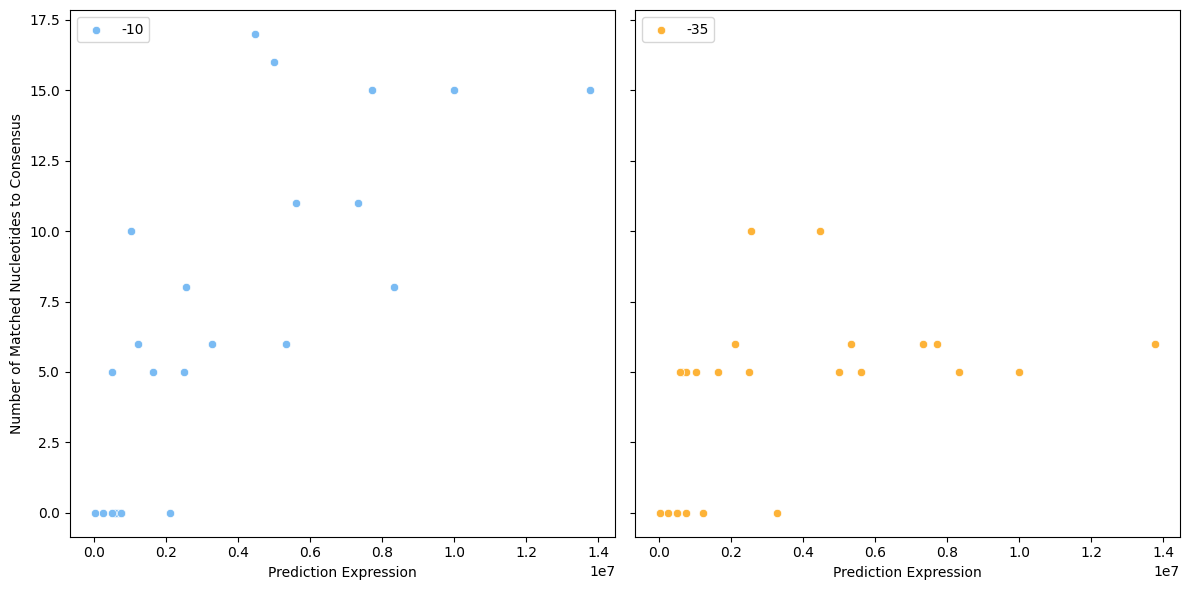

In [56]:
color_map  = {
    '35': '#FDB338',
    '10': '#7ABBF3',
}

# make subplots for each motif
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
for i, motif in enumerate(['10', '35']):
    sns.scatterplot(
        data=RFP_df,
        x='Rel_RFP',
        y=f'h{motif}_count',
        c=color_map[motif],
        label=f'-{motif}',
        ax=axes[i]
    )
    
    axes[i].set_xlabel('Prediction Expression')
    axes[i].set_ylabel(f'Number of Matched Nucleotides to Consensus')
    axes[i].legend(loc='upper left')

plt.tight_layout()
plt.show()

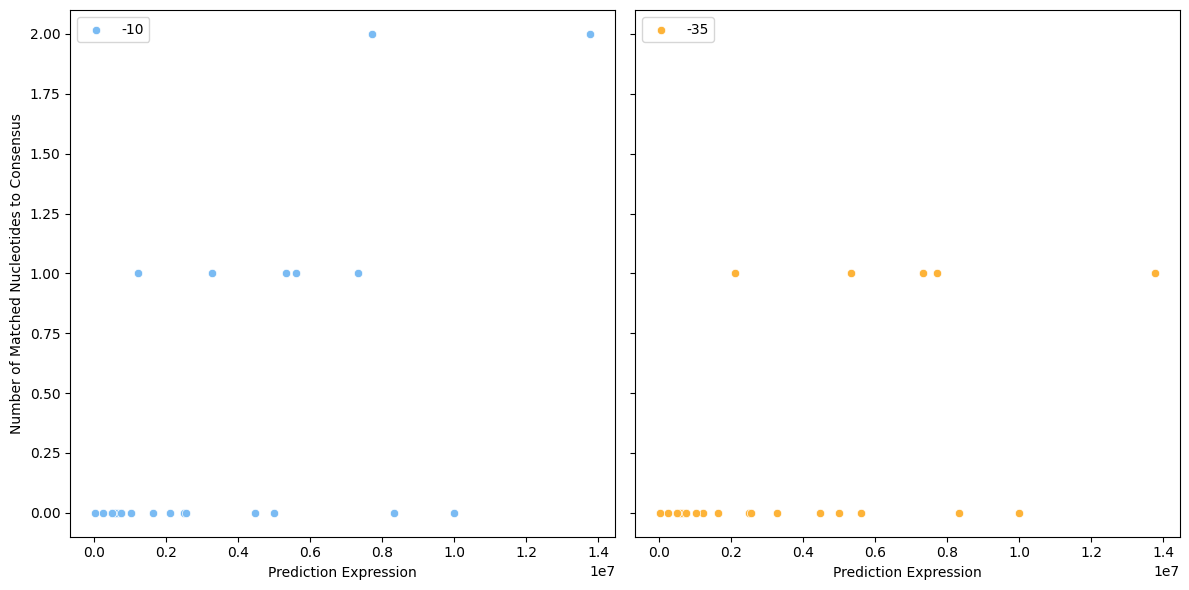

In [57]:
color_map  = {
    '35': '#FDB338',
    '10': '#7ABBF3',
}

# make subplots for each motif
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
for i, motif in enumerate(['10', '35']):
    sns.scatterplot(
        data=RFP_df,
        x='Rel_RFP',
        y=f'consensus_h{motif}_count',
        c=color_map[motif],
        label=f'-{motif}',
        ax=axes[i]
    )
    
    axes[i].set_xlabel('Prediction Expression')
    axes[i].set_ylabel(f'Number of Matched Nucleotides to Consensus')
    axes[i].legend(loc='upper left')

plt.tight_layout()
plt.show()

In [58]:
def highlight_promoters(s, min_shared=5):
    targets = {
        "TTGACA": "\033[91m", # Red
        "TATAAT": "\033[92m", # Green
    }

    color_map = [("", c) for c in s]

    for i in range(len(s)):
        for target, color in targets.items():
            t_len = len(target)
            if i + t_len <= len(s):
                window = s[i:i + t_len]
                match_positions = [j for j in range(t_len) if window[j] == target[j]]
                if len(match_positions) >= min_shared:
                    for j in match_positions:
                        idx = i + j
                        if color_map[idx][0] == "":
                            color_map[idx] = (color, color_map[idx][1])

    result = ""
    for color, char in color_map:
        if color:
            result += f"{color}{char}\033[0m"
        else:
            result += char

    return result

# plot the results
plt.figure(figsize=(10, 8))

for idx, row, in RFP_df.sort_values(by='Rel_RFP', ascending=False).iterrows():
    sequence = row['sequence']
    prediction = row['Rel_RFP']
    highlighted_sequence = highlight_promoters(sequence, min_shared=5)
    print(highlighted_sequence, prediction)

TTGACAAGGAGGTTATAATTTATAATAATAGTGTGG 13775305.395994704
TTGACGGGTATATTATACTGTATACTATCAGTGTGG 9981321.37566976
TTGACTTCTATATTATATAGATAAACTATGTGTGG 8321522.268740428
TTGACAAGGAGGTATAATTTATAATAATAGTGTGG 7710754.957804492
TTGACAAAGAGGTTATAATTTATACTATCCGTGTGG 7333737.587491175
TTGACTAGGATGATATAATGTATACTTTCCGTGTGG 5598198.820982489
TTGACACTATTTCCTATTTCTCTTATAATTTGTGTT 5325043.244194441
TTTGAAAATATATTATTGTATATATATTATGTGTGG 5004835.158850028
TTGACTTATAAAATATATTGATATAAACTGTGTGG 4475868.707434933
ATTTCAAACTGATACTGATATATAATTCTCGTGTGG 3282703.3807356525
TTGAAATAAGGAATATATTATTTTAACATGGTGTGG 2546404.7540198346
CCGAGCGGTTTCAAAATTGTGATATATATTTAACAAA 2501086.15889726
TTGACAATTAATCATCCGGCTCGTAATTTATGTGGA 2101393.7347182143
CCGAGCGGTTTCAAAATTGTGATCTATATTTAACAAA 1627660.610338653
AAGACGCTATTTCCTATTTCTCTTATAATTTGTGTT 1226581.02178734
TTGACTTCTATATTATATTAGTAAACTATGTGTGG 1011790.4426362508
TAAATAGGACTGGTGCAAGCCGACGATGGCGTGTGG 754405.5474760024
TTTACACTTTATGCTTCCGGCTCGTATGTTGTGTGG 747982.4968882885
TTAACAATTA

<Figure size 1000x800 with 0 Axes>